               ~If you could attenuate to every strand of quiveiring data, the future would be entirely calculable.~

# Ensemble Model Assignment---Firas Obeid 

For this assignment use data at: “https://www.kaggle.com/wendykan/lending-club-loan-data/download”

Ensemble Model Part 1:
1.	Read the data and do the preprocessing similar to the GBM file submitted to eLearning. Try not to exclude any variable as much as possible.
2.	Split the sample to test and train.
3.	Use sklearn to build a GBM model to predict whether a customer has any delinquent account. Do Grid search on as many parameters as you find useful. Include “Number of Trees”, and “Learning Rate” for sure. Use the train sample.
4.	For each model, store the AUC on the test and train. At the end, choose the best model that gives you the best bias-variance.
5.	Draw a histogram for predicted probabilities in each class. Something like the following graph, where for example orange is class 0 and blue is class 1. How should the ideal graph look like?

Ensemble Model Part 2:
1.	Try to keep as many variables as you can. Use “onehotencoder” to treat non-ordinal variables if needed. 
2.	Random Forest is famous as a powerful feature selection technique. Use RF to select the most important features; then use only those features in Grid Search.
3.	Save the results of the Grid search as an Excel file. Plot how model performance (on test sample) changes as model parameters change. Which parameters have significant impact on model’s performance? 
4.	Take a look at how people have done this competition. Following are some examples; but you can find many more. Choose two analyses that you find interesting and perform it. For example you may find some interesting missing value imputation approach. Be prepared to present your analysis in the class.
https://www.kaggle.com/adityasheth/analysis-and-modelling-of-lending-club-loan-data
https://www.kaggle.com/janiobachmann/lending-club-risk-analysis-and-metrics
https://www.kaggle.com/husainsb/lendingclub-analysis-and-predictions



In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.externals import joblib
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
sns.set_style('darkgrid')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [ ]:
data=pd.read_csv("loan.csv", low_memory= False)
data.shape

In [3]:
raw_data = data.copy()
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade sub_grade       emp_title emp_length home_ownership  annual_inc verification_status   issue_d loan_status pymnt_plan  url desc             purpose               title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  \
0 NaN        NaN       2500         2500           2500.0   36 months     13.56        84.92     C        C1            Chef  10+ years           RENT     55000.0        Not Verified  Dec-2018     Current          n  NaN  NaN  debt_consolidation  Debt consolidation    109xx         NY  18.24          0.0         Apr-2001             1.0                     NaN                    45.0       9.0      1.0       4341        10.3       34.0                   w    2386.02        2386.02       167.02           167.02           113.98          53.04                 0.0         0.0                      0.0     Feb-2019            84.92     Mar-2019           Feb-2019                         0.0                          NaN            1       Individual               NaN        NaN                       NaN             0.0           0.0      16901.0          2.0          2.0          1.0          2.0                 2.0       12560.0     69.0          2.0          7.0      2137.0      28.0   
1 NaN        NaN      30000        30000          30000.0   60 months     18.94       777.23     D        D2     Postmaster   10+ years       MORTGAGE     90000.0     Source Verified  Dec-2018     Current          n  NaN  NaN  debt_consolidation  Debt consolidation    713xx         LA  26.52          0.0         Jun-1987             0.0                    71.0                    75.0      13.0      1.0      12315        24.2       44.0                   w   29387.75       29387.75      1507.11          1507.11           612.25         894.86                 0.0         0.0                      0.0     Feb-2019           777.23     Mar-2019           Feb-2019                         0.0                          NaN            1       Individual               NaN        NaN                       NaN             0.0        1208.0     321915.0          4.0          4.0          2.0          3.0                 3.0       87153.0     88.0          4.0          5.0       998.0      57.0   
2 NaN        NaN       5000         5000           5000.0   36 months     17.97       180.69     D        D1  Administrative    6 years       MORTGAGE     59280.0     Source Verified  Dec-2018     Current          n  NaN  NaN  debt_consolidation  Debt consolidation    490xx         MI  10.51          0.0         Apr-2011             0.0                     NaN                     NaN       8.0      0.0       4599        19.1       13.0                   w    4787.21        4787.21       353.89           353.89           212.79         141.10                 0.0         0.0                      0.0     Feb-2019           180.69     Mar-2019           Feb-2019                         0.0                          NaN            1       Individual               NaN        NaN                       NaN             0.0           0.0     110299.0          0.0          1.0          0.0          2.0                14.0        7150.0     72.0          0.0          2.0         0.0      35.0   
3 NaN      

## Data Processing

In [4]:
# Choice Y variable: Loan Default or delinquent account 
# Choose acc_now_delinqfor  predicting if person has delinquent account for the purpose of the assignmnet
print("LOAN DEFAULT: ", data.loan_status.unique())
print("\nLOAN DEFAULTS VALUE COUNTS:\n", data.loan_status.value_counts())

LOAN DEFAULT:  ['Current' 'Fully Paid' 'Late (31-120 days)' 'In Grace Period'
 'Charged Off' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']

LOAN DEFAULTS VALUE COUNTS:
 Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64


In [5]:
print("\nDELIQUMENT ACCOUNT: ", data.acc_now_delinq.unique())
print("\nDELIQUMENT ACCOUNT VALUE COUNTS: \n", data.acc_now_delinq.value_counts())
#drop all rows with missing values in column acc_now_delinq, its a very imbalanced variable
data.dropna(subset=['acc_now_delinq'], inplace=True)


DELIQUMENT ACCOUNT:  [ 0.  1.  2.  3.  4.  6.  5. 14.  7. nan]

DELIQUMENT ACCOUNT VALUE COUNTS: 
 0.0     2251857
1.0        8293
2.0         421
3.0          50
4.0          11
5.0           3
6.0           2
14.0          1
7.0           1
Name: acc_now_delinq, dtype: int64


In [6]:
# Specail Treatment for loan status :Target variable 
loan_status = {'Current': 1, 'Fully Paid':1, 'Late (31-120 days)':0, 'In Grace Period': 1, 'Charged Off': 0, 'Late (16-30 days)': 1, 'Default':0,'Does not meet the credit policy. Status:Fully Paid': 1, 'Does not meet the credit policy. Status:Charged Off':0}

In [7]:
# Potential target variable. 
data.loan_status = data.loan_status.map(loan_status)
data.acc_now_delinq = np.where(data['acc_now_delinq'] == 0, 0, 1)

In [8]:
# Which object dtype variables are useful and can be converted to categorical variables
for i in data.columns[data.dtypes == object].values:
    print(i, data[i].unique())

term [' 36 months' ' 60 months']
grade ['C' 'D' 'B' 'A' 'E' 'F' 'G']
sub_grade ['C1' 'D2' 'D1' 'C4' 'C3' 'C2' 'D5' 'B3' 'A4' 'B5' 'C5' 'D4' 'E1' 'E4'
 'B4' 'D3' 'A1' 'E5' 'B2' 'B1' 'A5' 'F5' 'A3' 'E3' 'A2' 'E2' 'F4' 'G1'
 'G2' 'F1' 'F2' 'F3' 'G4' 'G3' 'G5']
emp_title ['Chef' 'Postmaster ' 'Administrative' ... 'Sales, Estimating & Design'
 'Acft mechanic' 'BABYSITTER']
emp_length ['10+ years' '6 years' '4 years' '< 1 year' '2 years' '9 years' nan
 '5 years' '3 years' '7 years' '1 year' '8 years']
home_ownership ['RENT' 'MORTGAGE' 'OWN' 'ANY' 'NONE' 'OTHER']
verification_status ['Not Verified' 'Source Verified' 'Verified']
issue_d ['Dec-2018' 'Nov-2018' 'Oct-2018' 'Sep-2018' 'Aug-2018' 'Jul-2018'
 'Jun-2018' 'May-2018' 'Apr-2018' 'Mar-2018' 'Feb-2018' 'Jan-2018'
 'Sep-2016' 'Aug-2016' 'Jul-2016' 'Jun-2016' 'May-2016' 'Apr-2016'
 'Mar-2016' 'Feb-2016' 'Jan-2016' 'Dec-2016' 'Nov-2016' 'Oct-2016'
 'Dec-2015' 'Nov-2015' 'Oct-2015' 'Sep-2015' 'Aug-2015' 'Jul-2015'
 'Jun-2015' 'May-2015' 'Apr-

earliest_cr_line ['Apr-2001' 'Jun-1987' 'Apr-2011' 'Feb-2006' 'Dec-2000' 'Sep-2002'
 'Nov-2004' 'Nov-1997' 'Aug-1998' 'Apr-2002' 'May-2007' 'Dec-2003'
 'Jun-2003' 'Oct-2008' 'Jul-1990' 'Dec-1988' 'Dec-2002' 'Oct-2010'
 'Jul-2005' 'Feb-2001' 'Dec-2004' 'Oct-2001' 'Sep-2003' 'Oct-2004'
 'Sep-2010' 'Oct-1999' 'Feb-1997' 'Jan-1995' 'Aug-2005' 'Apr-2005'
 'Oct-2005' 'Nov-2006' 'Sep-1999' 'Sep-2006' 'Aug-1996' 'May-2015'
 'Nov-1999' 'Dec-1998' 'Aug-1989' 'Apr-2012' 'Sep-2012' 'Jan-2011'
 'Jul-2013' 'Sep-2011' 'Aug-1999' 'Dec-1991' 'Nov-2007' 'Oct-2007'
 'Jul-1986' 'Nov-2014' 'Apr-1995' 'Jul-1992' 'Aug-2006' 'Oct-1988'
 'Feb-2005' 'Aug-2002' 'Oct-2003' 'Apr-2004' 'Jun-2007' 'Aug-1990'
 'Dec-1990' 'Jul-1997' 'Sep-1988' 'Sep-2008' 'Feb-1999' 'Apr-2007'
 'Aug-2004' 'Dec-2006' 'Mar-2007' 'Oct-2006' 'Jul-2014' 'May-2005'
 'Jun-1995' 'Mar-2014' 'Feb-2003' 'Aug-2007' 'Jul-1996' 'Jan-1991'
 'Aug-2008' 'Dec-2007' 'Sep-1997' 'Jan-2000' 'Jan-2005' 'Feb-2007'
 'Dec-2005' 'Jan-2012' 'Dec-1997' 'Mar-2009' 

last_pymnt_d ['Feb-2019' 'Jan-2019' nan 'Dec-2018' 'Nov-2018' 'Oct-2018' 'Sep-2018'
 'Aug-2018' 'Jul-2018' 'Jun-2018' 'May-2018' 'Apr-2018' 'Mar-2018'
 'Feb-2018' 'Jan-2018' 'Oct-2017' 'Apr-2017' 'Jan-2017' 'Aug-2017'
 'Dec-2017' 'Nov-2017' 'Nov-2016' 'May-2017' 'Jul-2017' 'Mar-2017'
 'Jun-2017' 'Feb-2017' 'Oct-2016' 'Sep-2017' 'Dec-2016' 'Sep-2016'
 'Aug-2016' 'Jul-2016' 'Jun-2016' 'May-2016' 'Apr-2016' 'Mar-2016'
 'Feb-2016' 'Jan-2016' 'Dec-2015' 'Nov-2015' 'Oct-2015' 'Sep-2015'
 'Aug-2015' 'Jul-2015' 'Jun-2015' 'May-2015' 'Apr-2015' 'Mar-2015'
 'Feb-2015' 'Jan-2015' 'Aug-2014' 'Jul-2014' 'May-2014' 'Sep-2014'
 'Jun-2014' 'Nov-2014' 'Feb-2014' 'Jan-2014' 'Mar-2014' 'Dec-2014'
 'Oct-2014' 'Apr-2014' 'Dec-2013' 'Nov-2013' 'Oct-2013' 'Sep-2013'
 'Aug-2013' 'Jul-2013' 'Jun-2013' 'May-2013' 'Apr-2013' 'Mar-2013'
 'Feb-2013' 'Jan-2013' 'Dec-2012' 'Nov-2012' 'Oct-2012' 'Sep-2012'
 'Aug-2012' 'Jul-2012' 'Jun-2012' 'May-2012' 'Apr-2012' 'Mar-2012'
 'Feb-2012' 'Jan-2012' 'Dec-2011' 'Nov-2011' 

hardship_type [nan 'INTEREST ONLY-3 MONTHS DEFERRAL']
hardship_reason [nan 'UNEMPLOYMENT' 'NATURAL_DISASTER' 'EXCESSIVE_OBLIGATIONS' 'MEDICAL'
 'INCOME_CURTAILMENT' 'DISABILITY' 'REDUCED_HOURS' 'FAMILY_DEATH'
 'DIVORCE']
hardship_status [nan 'ACTIVE' 'COMPLETED' 'BROKEN']
hardship_start_date [nan 'Feb-2019' 'Oct-2018' 'Nov-2018' 'Sep-2018' 'Jan-2019' 'Dec-2018'
 'Aug-2018' 'Jul-2018' 'May-2018' 'Sep-2017' 'Feb-2018' 'Dec-2017'
 'Apr-2018' 'Aug-2017' 'Jan-2018' 'Mar-2018' 'Jun-2018' 'Oct-2017'
 'Nov-2017' 'Jul-2017' 'Jun-2017' 'May-2017' 'Feb-2017' 'Apr-2017'
 'Jan-2017' 'Mar-2017']
hardship_end_date [nan 'Apr-2019' 'Dec-2018' 'Jan-2019' 'Feb-2019' 'Oct-2018' 'May-2019'
 'Mar-2019' 'Nov-2018' 'Aug-2018' 'Dec-2017' 'May-2018' 'Nov-2017'
 'Mar-2018' 'Jul-2018' 'Apr-2018' 'Jun-2018' 'Sep-2017' 'Sep-2018'
 'Oct-2017' 'Jan-2018' 'Feb-2018' 'Aug-2017' 'Jul-2017' 'Jun-2017'
 'May-2017' 'Apr-2017' 'Mar-2017']
payment_plan_start_date [nan 'Feb-2019' 'Oct-2018' 'Nov-2018' 'Dec-2018' 'Jan-2019' 'S

In [9]:
data.title.value_counts() # Checking if title variable is useful to encode

Debt consolidation                                                               1153293
Credit card refinancing                                                           469690
Home improvement                                                                  137436
Other                                                                             127714
Major purchase                                                                     44840
Medical expenses                                                                   25388
Business                                                                           20804
Car financing                                                                      20526
Debt Consolidation                                                                 15763
Vacation                                                                           14443
Moving and relocation                                                              13800
Home buying          

In [10]:
# List of variables that will be dropped accroding to relevance (Judgemenal dropping to prevent lookahead bias)
drop_list = ['sub_grade', 'issue_d', 'desc', 'title', 'zip_code','addr_state','earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'sec_app_earliest_cr_line', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date','debt_settlement_flag_date', 'settlement_date', 'collection_recovery_fee', 'recoveries','total_rec_late_fee','total_rec_prncp','settlement_status', 'settlement_amount', 'settlement_percentage', 'settlement_term','settlement_date','debt_settlement_flag','out_prncp','out_prncp_inv', 'total_rec_int']

In [11]:
# Numerical Variables
data_count = data.describe().transpose()
data_count

count           mean            std           min         25%            50%            75%           max
id                                                0.0            NaN            NaN           NaN         NaN            NaN            NaN           NaN
member_id                                         0.0            NaN            NaN           NaN         NaN            NaN            NaN           NaN
loan_amnt                                   2260639.0   15047.074179    9190.213945  5.000000e+02   8000.0000   12900.000000   20000.000000  4.000000e+04
funded_amnt                                 2260639.0   15041.807880    9188.380620  5.000000e+02   8000.0000   12875.000000   20000.000000  4.000000e+04
funded_amnt_inv                             2260639.0   15023.619599    9192.248971  0.000000e+00   8000.0000   12800.000000   20000.000000  4.000000e+04
int_rate                                    2260639.0      13.092961       4.832123  5.310000e+00      9.4900      12.620000      15.990000  3.099000e+01
installment                                 2260639.0     445.811796     267.172798  4.930000e+00    251.6500     377.990000     593.320000  1.719830e+03
annual_inc                                  2260639.0   77992.503748  112696.615778  0.000000e+00  46000.0000   65000.000000   93000.000000  1.100000e+08
loan_status                                 2260639.0       0.874221       0.331600  0.000000e+00      1.0000       1.000000       1.000000  1.000000e+00
url                                               0.0            NaN            NaN           NaN         NaN            NaN            NaN           NaN
dti                                         2258928.0      18.824339      14.183355 -1.000000e+00     11.8900      17.840000      24.490000  9.990000e+02
delinq_2yrs                                 2260639.0       0.306879       0.867230  0.000000e+00      0.0000       0.000000       0.000000  5.800000e+01
inq_last_6mths                              2260638.0       0.576835       0.885963  0.000000e+00      0.0000       0.000000       1.000000  3.300000e+01
mths_since_last_delinq                      1102166.0      34.540916      21.900471  0.000000e+00     16.0000      31.000000      50.000000  2.260000e+02
mths_since_last_record                       359156.0      72.312842      26.464094  0.000000e+00     55.0000      74.000000      92.000000  1.290000e+02
open_acc                                    2260639.0      11.612402       5.640861  0.000000e+00      8.0000      11.000000      14.000000  1.010000e+02
pub_rec                                     2260639.0       0.197528       0.570515  0.000000e+00      0.0000       0.000000       0.000000  8.600000e+01
revol_bal                                   2260639.0   16658.671776   22948.374657  0.000000e+00   5951.0000   11324.000000   20246.000000  2.904836e+06
revol_util                                  2258866.0      50.337696      24.713073  0.000000e+00     31.5000      50.300000      69.400000  8.923000e+02
total_acc                                   2260639.0      24.162552      11.987528  1.000000e+00     15.0000      22.000000      31.000000  1.760000e+02
out_prncp                                   2260639.0    4446.349922    7547.643340  0.000000e+00      0.0000       0.000000    6712.830000  4.000000e+04
out_prncp_inv                               2260639.0    4445.351894    7546.688496  0.000000e+00      0.0000       0.000000    6710.380000  4.000000e+04
total_pymnt                                 2260639.0   11824.127194    9889.621430  0.000000e+00   4272.5800    9060.994919   16708.079353  6.329688e+04
total_pymnt_inv                             2260639.0   11806.082917    9884.819818  0.000000e+00   4258.0200    9043.170000   16682.680000  6.329688e+04
total_rec_prncp                             2260639.0    9300.215028    8304.909800  0.000000e+00   2846.1950    6823.530000   13397.990000  4.000000e+04
total_rec_int                               

List of object dtypes:

 ['term' 'grade' 'sub_grade' 'emp_title' 'emp_length' 'home_ownership'
 'verification_status' 'issue_d' 'pymnt_plan' 'desc' 'purpose' 'title'
 'zip_code' 'addr_state' 'earliest_cr_line' 'initial_list_status'
 'last_pymnt_d' 'next_pymnt_d' 'last_credit_pull_d' 'application_type'
 'verification_status_joint' 'sec_app_earliest_cr_line' 'hardship_flag'
 'hardship_type' 'hardship_reason' 'hardship_status' 'hardship_start_date'
 'hardship_end_date' 'payment_plan_start_date' 'hardship_loan_status'
 'disbursement_method' 'debt_settlement_flag' 'debt_settlement_flag_date'
 'settlement_status' 'settlement_date']


List of unrelevant object dtypes that will be intially dropped

 ['sub_grade', 'issue_d', 'desc', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'sec_app_earliest_cr_line', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date', 'collectio

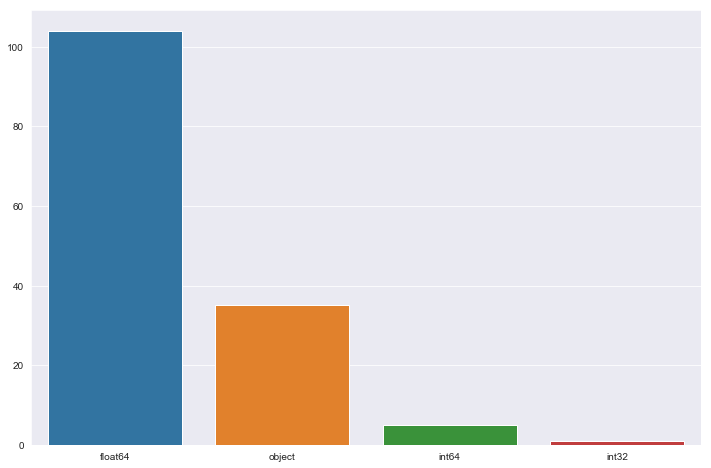

In [12]:
# Ploting the data types in the data set.
# We are concerned here with the object dtype, as sklearn takes only numeric data
data_type = data.dtypes.value_counts()
object_dtypes = data.columns[data.dtypes == object].values

plt.figure(figsize= (12,8))
sns.barplot (x = data_type.index, y = data_type.values);
print("List of object dtypes:\n\n",object_dtypes)
print("\n\nList of unrelevant object dtypes that will be intially dropped\n\n",drop_list)
print("\nThe number of numeric variables is:", len(data.columns[data.dtypes == 'float64']) + len(data.columns[data.dtypes == 'int64']))

In [13]:
# Get back numeric variables with zero count which are numerics that are uncountable
for i in data_count.index:
    if data_count.loc[i, 'count'] == 0:
        drop_list.append(i)
# Store in our dropping list variables with more than 90% null values-Drop the whole variable
for i in data.columns.values:
    if (data[i].isnull().sum() /len(data)) > 0.90:
        drop_list.append(i)

In [14]:
# Final drop list that has all variables that i wish to drop
print(len(drop_list), '\n',str(drop_list))
# del drop_list[:]

70 
 ['sub_grade', 'issue_d', 'desc', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'sec_app_earliest_cr_line', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date', 'collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'total_rec_prncp', 'settlement_status', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'settlement_date', 'debt_settlement_flag', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'id', 'member_id', 'url', 'id', 'member_id', 'url', 'desc', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_rea

####  All unnecessary variables will be dropped!

### Last phase of data dropping(Row wise):

In [15]:
# Get rid of unnecessary vairables. We use the .describe() attribute to get back the numerical columns
newdata = data.drop(drop_list, axis = 1)

In [16]:
newdata.head(10)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade            emp_title emp_length home_ownership  annual_inc verification_status  loan_status pymnt_plan             purpose    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  total_pymnt  total_pymnt_inv  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  \
0       2500         2500           2500.0   36 months     13.56        84.92     C                 Chef  10+ years           RENT     55000.0        Not Verified            1          n  debt_consolidation  18.24          0.0             1.0                     NaN                    45.0       9.0      1.0       4341        10.3       34.0                   w       167.02           167.02            84.92                         0.0                          NaN            1       Individual               0           0.0      16901.0          2.0          2.0          1.0          2.0                 2.0       12560.0     69.0          2.0          7.0      2137.0      28.0           42000.0     1.0         11.0           2.0                   9.0       1878.0         34360.0      5.9                       0.0          0.0               140.0                 212.0                    1.0             1.0       0.0                   1.0                       NaN                    2.0   
1      30000        30000          30000.0   60 months     18.94       777.23     D          Postmaster   10+ years       MORTGAGE     90000.0     Source Verified            1          n  debt_consolidation  26.52          0.0             0.0                    71.0                    75.0      13.0      1.0      12315        24.2       44.0                   w      1507.11          1507.11           777.23                         0.0                          NaN            1       Individual               0        1208.0     321915.0          4.0          4.0          2.0          3.0                 3.0       87153.0     88.0          4.0          5.0       998.0      57.0           50800.0     2.0         15.0           2.0                  10.0      24763.0         13761.0      8.3                       0.0          0.0               163.0                 378.0                    4.0             3.0       3.0                   4.0                       NaN                    4.0   
2       5000         5000           5000.0   36 months     17.97       180.69     D       Administrative    6 years       MORTGAGE     59280.0     Source Verified            1          n  debt_consolidation  10.51          0.0             0.0                     NaN                     NaN       8.0      0.0       4599        19.1       13.0                   w       353.89           353.89           180.69                         0.0                          NaN            1       Individual               0           0.0     110299.0          0.0          1.0          0.0          2.0                14.0        7150.0     72.0          0.0          2.0         0.0      35.0           24100.0     1.0          5.0           0.0                   4.0      18383.0         13800.0      0.0                       0.0          0.0                87.0                  92.0                   15.0            14.0       2.0                  77.0                       NaN                   14.0   

In [17]:
df = pd.DataFrame({'Count': newdata.isnull().sum(), 'Percent(%)': 100*newdata.isnull().sum()/len(data)})
df[df['Count'] > 0].sort_values(by='Percent(%)', ascending=False)

Count  Percent(%)
mths_since_last_record          1901483   84.112634
mths_since_recent_bc_dlq        1740938   77.010881
mths_since_last_major_derog     1679864   74.309255
mths_since_recent_revol_delinq  1520280   67.250012
mths_since_last_delinq          1158473   51.245378
il_util                         1068821   47.279597
mths_since_rcnt_il               909895   40.249460
all_util                         866319   38.321864
open_acc_6m                      866101   38.312221
inq_last_12m                     866101   38.312221
total_cu_tl                      866101   38.312221
inq_fi                           866100   38.312176
open_act_il                      866100   38.312176
open_il_12m                      866100   38.312176
open_il_24m                      866100   38.312176
total_bal_il                     866100   38.312176
open_rv_12m                      866100   38.312176
open_rv_24m                      866100   38.312176
max_bal_bc                       866100   38.312176
mths_since_recent_inq            295406   13.067367
emp_title                        166957    7.385390
num_tl_120dpd_2m                 153628    6.795778
emp_length                       146907    6.498472
mo_sin_old_il_acct               139042    6.150562
bc_util                           76042    3.363739
percent_bc_gt_75                  75350    3.333128
bc_open_to_buy                    74906    3.313488
mths_since_recent_bc              73383    3.246118
pct_tl_nvr_dlq                    70402    3.114252
avg_cur_bal                       70317    3.110492
mo_sin_rcnt_rev_tl_op             70248    3.107440
mo_sin_old_rev_tl_op              70248    3.107440
num_rev_accts                     70248    3.107440
num_tl_30dpd                      70247    3.107396
num_il_tl                         70247    3.107396
num_op_rev_tl                     70247    3.107396
num_rev_tl_bal_gt_0               70247    3.107396
total_rev_hi_lim                  70247    3.107396
num_tl_90g_dpd_24m                70247    3.107396
num_tl_op_past_12m                70247    3.107396
tot_cur_bal                       70247    3.107396
tot_hi_cred_lim                   70247    3.107396
num_bc_tl                         70247    3.107396
total_il_high_credit_limit        70247    3.107396
num_actv_rev_tl                   70247    3.107396
num_actv_bc_tl                    70247    3.107396
tot_coll_amt                      70247    3.107396
mo_sin_rcnt_tl                    70247    3.107396
num_accts_ever_120_pd             70247    3.107396
num_sats                          58561    2.590462
num_bc_sats                       58561    2.590462
mort_acc                          50001    2.211808
acc_open_past_24mths              50001    2.211808
total_bal_ex_mort                 50001    2.211808
total_bc_limit                    50001    2.211808
revol_util                         1773    0.078429
dti                                1711    0.075687
pub_rec_bankruptcies               1336    0.059098
collections_12_mths_ex_med          116    0.005131
chargeoff_within_12_mths            116    0.005131
tax_liens                            76    0.003362
inq_last_6mths                        1    0.000044

In [18]:
df['Percent(%)'].max(), df['Percent(%)'].median(), df['Percent(%)'].mean()
#Since mean > median of variables with NULL values, I decided to drop dataset rows where variable has NULL more than the mean

(84.11263364031143, 3.1073957407617936, 11.487640343185168)

In [19]:
newdata.shape

(2260639, 90)

In [20]:
newdata[newdata.dti<0] #during my NA imputation found this ratio had fields to be -1, only two, checking them out

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade                emp_title emp_length home_ownership  annual_inc verification_status  loan_status pymnt_plan             purpose  dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status   total_pymnt  total_pymnt_inv  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  mths_since_recent_bc_dlq  \
723428       15000        15000          15000.0   36 months      9.75       482.25     B  Maintenance electrician    5 years       MORTGAGE     94000.0     Source Verified            1          n  debt_consolidation -1.0          0.0             0.0                    63.0                    66.0      12.0      1.0      15445        45.8       24.0                   w  16188.784355         16188.78         11382.53                         0.0                         63.0            1       Individual               0           0.0      93070.0          1.0          3.0          1.0          4.0                10.0       77625.0     90.0          2.0          4.0      4108.0      73.0           33700.0     1.0         10.0           2.0                   8.0       8461.0          3942.0     61.7                       0.0          0.0                98.0                 150.0                    2.0             2.0       1.0                  15.0                      63.0   
1377778      17000        17000          17000.0   60 months     13.49       391.08     C                  teacher  10+ years       MORTGAGE     75000.0        Not Verified            1          n  debt_consolidation -1.0          1.0             0.0                    23.0                     NaN      12.0      0.0      44587        78.2       34.0                   w  20423.499106         20423.50         12948.38                         0.0                          NaN            1        Joint App               0           0.0     299893.0          0.0          1.0          1.0          1.0                 8.0       40332.0      NaN          0.0          1.0     14618.0      78.0           57000.0     2.0          0.0           4.0                   2.0      24991.0          3242.0     89.6                       0.0          0.0               162.0                 294.0                   15.0             8.0       3.0                  27.0                       NaN   

         mths_since_recent_inq  mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  num_rev_accts  num_rev_tl_bal_gt_0  num_sats  num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit hardship_flag disbursement_method  
723428                    10.0                            63.0                    0.0             3.0              5.0          3.0        6.0       10.0            9.0           13.0                  5.0      11.0               0.0           0.0                 0.0                 3.0            95.8              33.3                   1.0        0.0         127743.0            93070.0         10300.0                     94043.0             N                Cash  
1377778                    2.0                            35.0                    0.0             5.0      

In [21]:
# dropping rows with variables missing vaules more than 5% of total data avialble
# for i in list(newdata.columns.values):
#     if (newdata[i].isnull().sum() /len(data)) > 0.05:
#          newdata.dropna(subset=[i], how='all', inplace = True) NOT USED

## Missing Data Imputation: 
* Mean/Mode/Zero: Specific Variables
* Flag Technique: All Remaining Variables with Nans left

In [22]:
#dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
newdata.dti.fillna(newdata.dti.mean(),inplace=True)
#inq_last_6mths:  Credit inquiries in the last 6 months at time of application for the secondary applicant
newdata.inq_last_6mths.fillna(newdata.inq_last_6mths.mode()[0],inplace=True)
# revol_util:  Ratio of total current balance to high credit/credit limit for all revolving accounts
newdata.revol_util.fillna(newdata.revol_util.mean(),inplace=True) 


#bc_open_to_buy: Total open to buy on revolving bankcards.
newdata.bc_open_to_buy.fillna(newdata.bc_open_to_buy.mode()[0],inplace=True) 

#bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts.
newdata.bc_util.fillna(newdata.bc_util.mean(),inplace=True) 

#num_tl_120dpd_2m: Number of accounts currently 120 days past due (updated in past 2 months). Majority are zeros, replace with zero!
newdata.num_tl_120dpd_2m.fillna(0,inplace=True)

#pct_tl_nvr_dlq: Percent of trades never delinquent
newdata.pct_tl_nvr_dlq.fillna(newdata.pct_tl_nvr_dlq.mean(),inplace=True) 

#percent_bc_gt_75 :Percentage of all bankcard accounts > 75% of limit.
newdata.percent_bc_gt_75.fillna(newdata.percent_bc_gt_75.mode()[0],inplace=True)

In [23]:
# Not categorical variables imputation. If minimum in a variable is +ve or zero--> flag with large negative number and vice versa
for i in list(newdata.columns[newdata.dtypes != object].values):
    if newdata[i].min() >= 0:
        newdata[i].fillna(-100000000,inplace=True)
    else:
        newdata[i].fillna(100000000,inplace=True)


In [24]:
# plt.figure(figsize= (20,8))
# sns.heatmap(newdata.isnull(),yticklabels=False,cbar=False,cmap='viridis');

### Remaining Missing Values Imputation

In [25]:
df2 = pd.DataFrame({'Count': newdata.isnull().sum(), 'Percent(%)': 100*newdata.isnull().sum()/len(newdata), "dtype": newdata.dtypes})
df2[df2['Count'] > 0]

Count  Percent(%)   dtype
emp_title   166957    7.385390  object
emp_length  146907    6.498472  object

Similar to how it’s sometimes most appropriate to impute a missing numeric feature with zeros, sometimes a categorical feature’s missing-ness itself is valuable information that should be explicitly encoded. If this is the case, most-common-class imputing would cause this information to be lost. Instead, just replace those values with a value like “Unknown” or “Missing.”

In [26]:
newdata['emp_length'].fillna('Missing', inplace = True)
#emp_title will be dropped since it has many classes to be converted to dummies
newdata.drop('emp_title',axis=1,inplace=True) #unnessary variable found in this analysis

In [27]:
# Check for any nulls
newdata.isnull().any().sum(), newdata.shape #we still have null since we got 1

(1, (2260639, 90))

## Categorical Features Encoding

In [28]:
categorical_vars = list(newdata.columns[newdata.dtypes == object].values)
categorical_vars

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'disbursement_method']

In [29]:
obj_df = newdata.select_dtypes(include=['object']).copy()
obj_df.head()

term grade emp_length home_ownership verification_status pymnt_plan             purpose initial_list_status application_type hardship_flag disbursement_method
0   36 months     C  10+ years           RENT        Not Verified          n  debt_consolidation                   w       Individual             N                Cash
1   60 months     D  10+ years       MORTGAGE     Source Verified          n  debt_consolidation                   w       Individual             N                Cash
2   36 months     D    6 years       MORTGAGE     Source Verified          n  debt_consolidation                   w       Individual             N                Cash
3   36 months     D  10+ years       MORTGAGE     Source Verified          n  debt_consolidation                   w       Individual             N                Cash
4   60 months     C  10+ years       MORTGAGE        Not Verified          n  debt_consolidation                   w       Individual             N                Cash

In [30]:
obj_df = pd.get_dummies(obj_df,drop_first=True)
obj_df.shape

(2260639, 43)

In [31]:
newdata.drop(categorical_vars,axis=1,inplace=True) #drop transformed original features

#### Model Data:

In [32]:
#Finally!!
model_data= pd.concat([newdata, obj_df],axis=1)
model_data.shape

(2260639, 121)

#### Save Processed (Only Once)

In [33]:
save_model_data = model_data.to_csv (r'C:\Users\Firo Obeid\Desktop\test\modeldata.csv', index = None, header=True)

In [34]:
#Final check if all dtypes are numeric and NO NULL data found!
print("Number of nonNAN values in the refined dataset is: " ,model_data.isnull().any().sum())
print(model_data.dtypes.value_counts())

Number of nonNAN values in the refined dataset is:  0
float64    72
uint8      43
int64       5
int32       1
dtype: int64


In [35]:

model_data = model_data.astype('float32')

In [36]:
print(model_data.dtypes.value_counts())

float32    121
dtype: int64


## Train/Test Split

In [37]:
# Splitting the data manuelly is more appropriate to train and test model on than random shuffeling for timeseries. Here we dont have a ts dataset 
# We can awitch the target with account delinquent, but we are predicting if the individual will default
target = 'loan_status'
X = model_data.drop(target, axis = 1)
Y = model_data[target]

#### Note:
    Our target variable classes are unbalanced from the count in the cell below. Since we are implementing a tree based algorithm, our model will perform well on this imbalanced dataset due to the hierarchical structure of the algorithm which allows the model to learn signals from both classes: "0" and "1".  

In [38]:
Y.value_counts()

1.0    1976298
0.0     284341
Name: loan_status, dtype: int64

In [39]:
# split_percentage = 0.2
# split = int(split_percentage*len(model_data))

# # Train data set
# X_train = X[split:]
# y_train = Y[split:] 

# # Test data set
# X_test = X[:split]
# y_test = Y[:split]

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state= 0)

In [40]:
params = {'n_estimators': 3,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
model = ensemble.GradientBoostingClassifier(**params)
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=6,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
# calculate AUC
roc_auc_score(y_test, model.predict(X_test))

0.5

In [42]:
# A better model
params = {'n_estimators': 100,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
model = ensemble.GradientBoostingClassifier(**params)
model.fit(X_train, y_train)

roc_auc_score(y_test, model.predict(X_test))

0.682149137873088

### Feature Importance for GridSearch

In [43]:
feature_importance = pd.DataFrame()
feature_importance['Variable'] = X_train.columns
feature_importance['Importance'] = model.feature_importances_

# feature_importance values in descending order
feature_importance.sort_values(by='Importance', ascending=False).head(10)


Variable  Importance
18  last_pymnt_amnt    0.222177
16      total_pymnt    0.205373
3          int_rate    0.136829
25      open_acc_6m    0.056443
32      open_rv_12m    0.046075
37           inq_fi    0.039892
4       installment    0.035986
28      open_il_24m    0.032998
30     total_bal_il    0.030331
1       funded_amnt    0.028298

In [44]:
#Search Grid on only these features to save time
features = list(feature_importance['Variable'][feature_importance.Importance >0].values)
features


['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'dti',
 'inq_last_6mths',
 'mths_since_last_record',
 'total_pymnt',
 'total_pymnt_inv',
 'last_pymnt_amnt',
 'open_acc_6m',
 'open_act_il',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'bc_open_to_buy',
 'num_rev_accts',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'term_ 60 months',
 'grade_B',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'pymnt_plan_y',
 'initial_list_status_w',
 'application_type_Joint App',
 'hardship_flag_Y',
 'disbursement_method_DirectPay']

In [46]:
# from tqdm import tqdm_notebook as tqdm

### Parameter Tuning Using Loops

In [48]:
X_grid = model_data[features]
Y_grid = model_data[target]
X_train_grid,X_test_grid,y_train_grid,y_test_grid=train_test_split(X_grid,Y_grid,test_size=0.3,random_state= 0)
# now we run a grid search on GBM parameters
# save the results to choose the best parameters
results = pd.DataFrame(columns=["# Trees", "Max Features", "Learning Rate",
                                "Max Leaf Nodes", "Min Split","AUC-Train","AUC-Test", "Loss-Train",'Loss-Test'])
n = 0    
for n_estimators in [50, 200]:
        for max_features in ['auto']:
                for learning_rate in [0.001, 0.01, 0.5]:
                    for max_leaf_nodes in [4, 12, 20]:
                            for min_samples_split in [0.0001, 0.1, 0.2]:
                                n += 1
                                print("Loop number ", str(n))
                                params = {'n_estimators': n_estimators,  
                                  'max_features':max_features,'max_leaf_nodes':max_leaf_nodes, 
                                  'learning_rate': learning_rate, 
                                  'min_samples_split': min_samples_split,
                                  'subsample':0.8, 'random_state':1}
                                model = ensemble.GradientBoostingClassifier(**params)
                                model.fit(X_train_grid, y_train_grid)
                                results.loc[len(results)]=[n_estimators, max_features, learning_rate,
                                               max_leaf_nodes, min_samples_split,
                                               roc_auc_score(y_train_grid, model.predict(X_train_grid)),
                                               roc_auc_score(y_test_grid, model.predict(X_test_grid)),
                                               model.loss_(y_train_grid,model.predict(X_train_grid)),
                                               model.loss_(y_test_grid,model.predict(X_test_grid))]

Loop number  1
Loop number  2
Loop number  3
Loop number  4
Loop number  5
Loop number  6
Loop number  7
Loop number  8
Loop number  9
Loop number  10
Loop number  11
Loop number  12
Loop number  13
Loop number  14
Loop number  15
Loop number  16
Loop number  17
Loop number  18
Loop number  19
Loop number  20
Loop number  21
Loop number  22
Loop number  23
Loop number  24
Loop number  25
Loop number  26
Loop number  27
Loop number  28
Loop number  29
Loop number  30
Loop number  31
Loop number  32
Loop number  33
Loop number  34
Loop number  35
Loop number  36
Loop number  37
Loop number  38
Loop number  39
Loop number  40
Loop number  41
Loop number  42
Loop number  43
Loop number  44
Loop number  45
Loop number  46
Loop number  47
Loop number  48
Loop number  49
Loop number  50
Loop number  51
Loop number  52
Loop number  53
Loop number  54


In [49]:
results.sort_values(by=['AUC-Train','AUC-Test',"AUC-Train","AUC-Test", "Loss-Train",'Loss-Test'])

# Trees Max Features  Learning Rate Max Leaf Nodes  Min Split  AUC-Train  AUC-Test  Loss-Train  Loss-Test
0       50         auto          0.001              4     0.0001   0.500000  0.500000    0.878006   0.878260
1       50         auto          0.001              4     0.1000   0.500000  0.500000    0.878006   0.878260
2       50         auto          0.001              4     0.2000   0.500000  0.500000    0.878006   0.878260
3       50         auto          0.001             12     0.0001   0.500000  0.500000    0.878006   0.878260
4       50         auto          0.001             12     0.1000   0.500000  0.500000    0.878006   0.878260
5       50         auto          0.001             12     0.2000   0.500000  0.500000    0.878006   0.878260
6       50         auto          0.001             20     0.0001   0.500000  0.500000    0.878006   0.878260
7       50         auto          0.001             20     0.1000   0.500000  0.500000    0.878006   0.878260
8       50         auto          0.001             20     0.2000   0.500000  0.500000    0.878006   0.878260
9       50         auto          0.010              4     0.0001   0.500000  0.500000    0.878006   0.878260
10      50         auto          0.010              4     0.1000   0.500000  0.500000    0.878006   0.878260
11      50         auto          0.010              4     0.2000   0.500000  0.500000    0.878006   0.878260
12      50         auto          0.010             12     0.0001   0.500000  0.500000    0.878006   0.878260
13      50         auto          0.010             12     0.1000   0.500000  0.500000    0.878006   0.878260
14      50         auto          0.010             12     0.2000   0.500000  0.500000    0.878006   0.878260
15      50         auto          0.010             20     0.0001   0.500000  0.500000    0.878006   0.878260
16      50         auto          0.010             20     0.1000   0.500000  0.500000    0.878006   0.878260
17      50         auto          0.010             20     0.2000   0.500000  0.500000    0.878006   0.878260
27     200         auto          0.001              4     0.0001   0.500000  0.500000    0.878006   0.878260
28     200         auto          0.001              4     0.1000   0.500000  0.500000    0.878006   0.878260
29     200         auto          0.001              4     0.2000   0.500000  0.500000    0.878006   0.878260
30     200         auto          0.001             12     0.0001   0.500000  0.500000    0.878006   0.878260
31     200         auto          0.001             12     0.1000   0.500000  0.500000    0.878006   0.878260
32     200         auto          0.001             12     0.2000   0.500000  0.500000    0.878006   0.878260
33     200         auto          0.001             20     0.0001   0.500000  0.500000    0.878006   0.878260
34     200         auto          0.001             20     0.1000   0.500000  0.500000    0.878006   0.878260
35     200         auto          0.001             20     0.2000   0.500000  0.500000    0.878006   0.878260
38     200         auto          0.010              4     0.2000   0.500000  0.500000    0.878006   0.878260
41     200         auto          0.010             12     0.2000   0.500161  0.500152    0.877956   0.878213
44     200         auto          0.010             20     0.2000   0.500161  0.500152    0.877956   0.878213
36     200         auto          0.010              4     0.0001   0.534339  0.534588    0.867302   0.867467
37     200         auto          0.010              4     0.1000   0.534339  0.534588    0.867302   0.867467
39     200         auto          0.010             12     0.0001   0.553476  0.553959    0.861333   0.861418
42     200         auto          0.010             20     0.0001   0.553476  0.553959    0.861333   0.861418
40     200         auto          0.010             12     0.1000   0.555637  0.556099    0.860659   0.860748
43     200         auto          0.010             20     0.1000   0.555637  0.

In [50]:
export_csv = results.to_csv (r'C:\Users\Firo Obeid\Desktop\test\gridsearch.csv', index = None, header=True)

In [51]:
read_results = pd.read_csv(r'C:\Users\Firo Obeid\Desktop\test\gridsearch.csv')
read_results.head() 

# Trees Max Features  Learning Rate  Max Leaf Nodes  Min Split  AUC-Train  AUC-Test  Loss-Train  Loss-Test
0       50         auto          0.001               4     0.0001        0.5       0.5    0.878006    0.87826
1       50         auto          0.001               4     0.1000        0.5       0.5    0.878006    0.87826
2       50         auto          0.001               4     0.2000        0.5       0.5    0.878006    0.87826
3       50         auto          0.001              12     0.0001        0.5       0.5    0.878006    0.87826
4       50         auto          0.001              12     0.1000        0.5       0.5    0.878006    0.87826

In [52]:
# loss_test = results['AUC-Test']
read_results.sort_values(by=['Loss-Test'])

# Trees Max Features  Learning Rate  Max Leaf Nodes  Min Split  AUC-Train  AUC-Test  Loss-Train  Loss-Test
51      200         auto          0.500              20     0.0001   0.830964  0.831210    0.776064   0.776174
48      200         auto          0.500              12     0.0001   0.830964  0.831210    0.776064   0.776174
49      200         auto          0.500              12     0.1000   0.808078  0.808029    0.783497   0.783682
52      200         auto          0.500              20     0.1000   0.808078  0.808029    0.783497   0.783682
53      200         auto          0.500              20     0.2000   0.794692  0.794121    0.787746   0.788135
50      200         auto          0.500              12     0.2000   0.794692  0.794121    0.787746   0.788135
45      200         auto          0.500               4     0.0001   0.788055  0.788076    0.789638   0.789820
47      200         auto          0.500               4     0.2000   0.781385  0.780775    0.792172   0.792625
46      200         auto          0.500               4     0.1000   0.777531  0.778003    0.793316   0.793397
24       50         auto          0.500              20     0.0001   0.750667  0.751270    0.801123   0.801137
21       50         auto          0.500              12     0.0001   0.750667  0.751270    0.801123   0.801137
25       50         auto          0.500              20     0.1000   0.730718  0.731467    0.807339   0.807295
22       50         auto          0.500              12     0.1000   0.730718  0.731467    0.807339   0.807295
23       50         auto          0.500              12     0.2000   0.722798  0.723027    0.809752   0.809888
26       50         auto          0.500              20     0.2000   0.722798  0.723027    0.809752   0.809888
18       50         auto          0.500               4     0.0001   0.712850  0.713817    0.813001   0.812879
19       50         auto          0.500               4     0.1000   0.712409  0.713250    0.812995   0.812995
20       50         auto          0.500               4     0.2000   0.704973  0.705531    0.815477   0.815576
40      200         auto          0.010              12     0.1000   0.555637  0.556099    0.860659   0.860748
43      200         auto          0.010              20     0.1000   0.555637  0.556099    0.860659   0.860748
39      200         auto          0.010              12     0.0001   0.553476  0.553959    0.861333   0.861418
42      200         auto          0.010              20     0.0001   0.553476  0.553959    0.861333   0.861418
36      200         auto          0.010               4     0.0001   0.534339  0.534588    0.867302   0.867467
37      200         auto          0.010               4     0.1000   0.534339  0.534588    0.867302   0.867467
41      200         auto          0.010              12     0.2000   0.500161  0.500152    0.877956   0.878213
44      200         auto          0.010              20     0.2000   0.500161  0.500152    0.877956   0.878213
38      200         auto          0.010               4     0.2000   0.500000  0.500000    0.878006   0.878260
15       50         auto          0.010              20     0.0001   0.500000  0.500000    0.878006   0.878260
5        50         auto          0.001              12     0.2000   0.500000  0.500000    0.878006   0.878260
4        50         auto          0.001              12     0.1000   0.500000  0.500000    0.878006   0.878260
3        50         auto          0.001              12     0.0001   0.500000  0.500000    0.878006   0.878260
2        50         auto          0.001               4     0.2000   0.500000  0.500000    0.878006   0.878260
1        50         auto          0.001               4     0.1000   0.500000  0.500000    0.878006   0.878260
7        50         auto          0.001              20     0.1000   0.500000  0.500000    0.878006   0.878260
6        50         auto          0.001              20     0.0001   0.500000  0.500000    0.878006   0.878260
34      

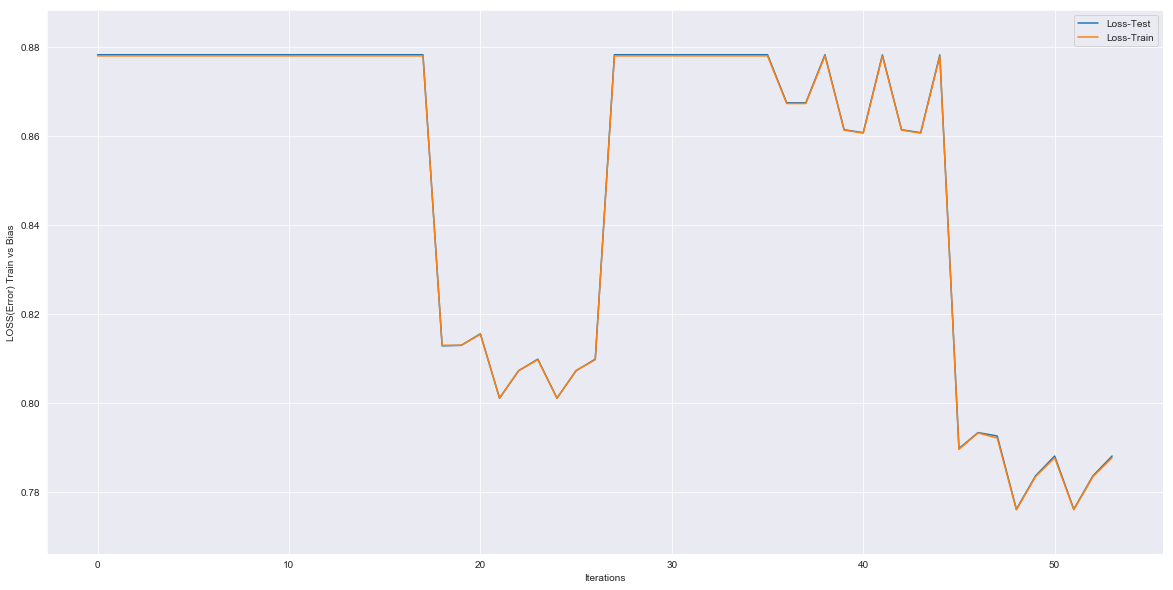

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.ylim(read_results['Loss-Test'].min()-0.01, read_results['Loss-Test'].max()+0.01)
plt.plot(range(len(read_results['Loss-Test'])),
        read_results['Loss-Test']);

plt.plot(range(len(read_results['Loss-Train'])),
        read_results['Loss-Train']);
plt.legend()
plt.xlabel('Iterations');
plt.ylabel('LOSS(Error) Train vs Bias');

Turns out number of trees (estimators) with a higher learning rate had the most impact on estimating a better model than any other hyperparameter.

In [69]:
#choosing best parameters from gridsearch
params = {'n_estimators': 200,'max_features':'auto','max_leaf_nodes':20,
          'learning_rate': 0.5,'min_samples_split': 0.0001,'subsample':0.8, 'random_state':1}
best_model = ensemble.GradientBoostingClassifier(**params)
best_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=20,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.0001,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [81]:
roc_auc_score(y_test, best_model.predict(X_test))

0.8308210105946234

In [ ]:
from sklearn_evaluation import plot
plot.roc(y_test, best_model.predict(X_test))#best_model.predict_proba(X_test)

#### Optional GridSearch(): My Computer is super slow

In [58]:
#### GRIDSEARCH #### 
#Hypertuning parameters
# param_grid = {'n_estimators': [1, 2], 'max_features': ['sqrt','auto'], 'learning_rate': [0.001, 0.01, 0.1], 'max_leaf_nodes': [6, 8, 20], 'min_samples_split': [0.0001, 0.1, 0.5]}
# grid = GridSearchCV(ensemble.GradientBoostingClassifier(),param_grid,refit=True,verbose=0)
# grid.fit(X_train,y_train)
# print(grid.best_params_)

### Final Feature Importance

In [70]:
feature_importance_2 = pd.DataFrame()
feature_importance_2['Variable'] = X_train.columns
feature_importance_2['Importance'] = best_model.feature_importances_

# feature_importance values in descending order
feature_importance_2.sort_values(by='Importance', ascending=False).head(10)


Variable  Importance
18  last_pymnt_amnt    0.209668
16      total_pymnt    0.200758
3          int_rate    0.158964
39     inq_last_12m    0.083916
30     total_bal_il    0.075870
4       installment    0.048896
1       funded_amnt    0.042639
32      open_rv_12m    0.041668
28      open_il_24m    0.017071
0         loan_amnt    0.013443

In [71]:
#Save my important ranked feature, by the GBM, in CSV. You never know what could happen!
# I can save all DFs in a single excel by specifying different sheet names, but I want them in Separate csv files
export_csv_2 = feature_importance_2.to_csv (r'C:\Users\Firo Obeid\Desktop\test\Feature_importance.csv', index = None, header=True)

In [72]:
proba_classes = pd.DataFrame()
proba_classes['Y']= y_test
proba_classes['Class:0'] = best_model.predict_proba(X_test)[:, 0]
proba_classes['Class:1'] = best_model.predict_proba(X_test)[:, 1]
proba_classes

Y   Class:0       Class:1
2223373  1.0  0.000063  9.999374e-01
148456   1.0  0.016644  9.833560e-01
1657103  1.0  0.103809  8.961913e-01
98836    1.0  0.012983  9.870170e-01
879222   1.0  0.000074  9.999260e-01
1635321  1.0  0.226868  7.731320e-01
970633   1.0  0.005200  9.947999e-01
684932   1.0  0.035748  9.642516e-01
1358992  1.0  0.016492  9.835076e-01
1632914  1.0  0.008564  9.914360e-01
1029443  1.0  0.011373  9.886271e-01
100689   1.0  0.025016  9.749843e-01
1912936  1.0  0.037688  9.623124e-01
951282   1.0  0.018645  9.813551e-01
871731   0.0  0.068761  9.312393e-01
290422   1.0  0.264050  7.359504e-01
873783   1.0  0.001045  9.989546e-01
1431031  1.0  0.000368  9.996318e-01
2117843  1.0  0.002892  9.971079e-01
1778981  0.0  0.999999  1.386683e-06
394964   1.0  0.031388  9.686121e-01
859753   1.0  0.014779  9.852210e-01
174202   1.0  0.030633  9.693672e-01
915610   1.0  0.013533  9.864669e-01
21531    1.0  0.001249  9.987507e-01
1913808  1.0  0.016671  9.833286e-01
228861   1.0  0.045023  9.549773e-01
403978   1.0  0.076505  9.234949e-01
728121   1.0  0.020707  9.792933e-01
890135   1.0  0.218671  7.813286e-01
2132580  1.0  0.018464  9.815359e-01
1277034  1.0  0.002264  9.977361e-01
1290218  1.0  0.001861  9.981386e-01
1731652  1.0  0.000448  9.995525e-01
1708593  1.0  0.020825  9.791754e-01
1287089  1.0  0.047433  9.525667e-01
1543242  1.0  0.000223  9.997766e-01
1772620  1.0  0.000591  9.994086e-01
2245967  1.0  0.000679  9.993210e-01
1563072  1.0  0.000066  9.999336e-01
1848963  0.0  0.999987  1.254456e-05
1590309  1.0  0.000063  9.999372e-01
779745   0.0  0.644959  3.550407e-01
949155   1.0  0.000757  9.992433e-01
1791452  1.0  0.000674  9.993259e-01
1978468  1.0  0.000314  9.996863e-01
1707006  1.0  0.018300  9.816996e-01
585376   1.0  0.000201  9.997991e-01
1389853  1.0  0.000129  9.998714e-01
293091   1.0  0.482034  5.179664e-01
1215298  1.0  0.001027  9.989731e-01
450332   1.0  0.204165  7.958351e-01
438940   1.0  0.100355  8.996446e-01
2108453  1.0  0.022460  9.775396e-01
1831889  1.0  0.058496  9.415041e-01
935999   1.0  0.000148  9.998517e-01
1328357  1.0  0.004176  9.958237e-01
251288   1.0  0.034627  9.653734e-01
980021   1.0  0.254898  7.451018e-01
1609846  1.0  0.101217  8.987826e-01
395443   1.0  0.000150  9.998502e-01
616511   1.0  0.049367  9.506334e-01
324162   1.0  0.026616  9.733842e-01
33559    1.0  0.081458  9.185417e-01
1121752  1.0  0.000769  9.992310e-01
2254381  1.0  0.000308  9.996921e-01
728831   1.0  0.055891  9.441093e-01
2223512  1.0  0.086526  9.134737e-01
1893818  1.0  0.000414  9.995861e-01
2253020  1.0  0.000214  9.997855e-01
1744052  1.0  0.001081  9.989192e-01
1461569  0.0  0.098151  9.018490e-01
299667   1.0  0.159651  8.403491e-01
829424   1.0  0.001451  9.985494e-01
1938968  1.0  0.000060  9.999398e-01
756763   1.0  0.019301  9.806990e-01
561746   1.0  0.002343  9.976572e-01
1522591  1.0  0.170335  8.296648e-01
1978241  1.0  0.000341  9.996586e-01
1532183  1.0  0.118209  8.817912e-01
161576   1.0  0.067208  9.327922e-01
1124083  1.0  0.001792  9.982083e-01
2159930  1.0  0.161044  8.389562e-01
1521117  0.0  0.030657  9.693432e-01
2096428  1.0  0.001852  9.981481e-01
407504   1.0  0.149193  8.508073e-01
903843   1.0  0.008403  9.915969e-01
114718   1.0  0.089893  9.101070e-01
1975970  0.0  0.889993  1.100065e-01
1387897  1.0  0.000499  9.995006e-01
150225   1.0  0.055157  9.448430e-01
1778643  1.0  0.065728  9.342723e-01
51567    1.0  0.000033  9.999667e-01
1249691  1.0  0.001561  9.984387e-01
672154   1.0  0.038240  9.617603e-01
1009134  0.0  0.989116  1.088360e-02
1998960  1.0  0.000213  9.997872e-01
1305869  1.0  0.000268  9.997316e-01
210292   1.0  0.028783  9.712167e-01
1585954  1.0  0.044922  9.550781e-01
48375    1.0  0.284092  7.159080e-01
2085404  1.0  0.020897  9.791025e-01
172513   1.0  0.076655  9.233452e-01
770662   1.0  0.001053  9.989468e-01
2119077  1.0  0.029735  9.702649e-01
514341   1.0  0.208991  7.910085e-01
753734   1.0  0.057276  9.427238e-01
604096   1.0  0

### Histogram of Class Probabilities
If the model is very good, it should assign probabilities to the two different classes in a way it completely separates and distinguishes between the two classes. The "0" class would be visualized towards the left, and the 1 class would be visualized towrad the right.

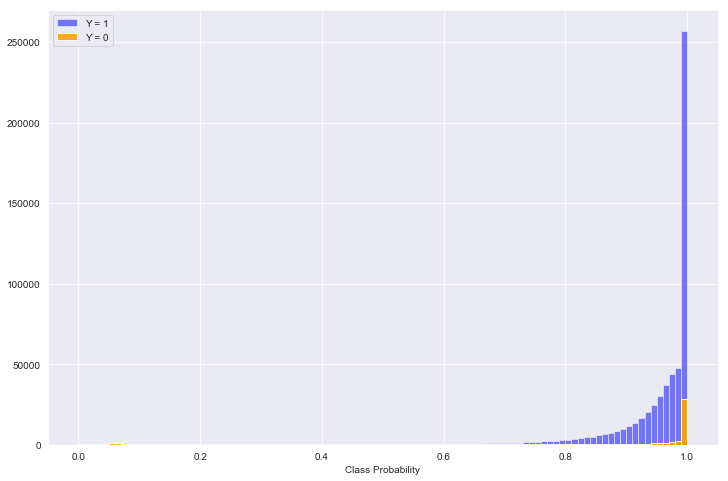

In [73]:
plt.figure(figsize=(12,8))
proba_classes[proba_classes.Y==1]['Class:1'].hist(alpha=0.5,color='blue',
                                              bins=100,label='Y = 1')
proba_classes[proba_classes.Y==0]['Class:0'].hist(alpha=0.9,color='orange',
                                              bins=100,label='Y = 0')
plt.legend()
plt.xlabel('Class Probability');

In [74]:
n_estimators = params['n_estimators']
def heldout_score(model, X_test, y_test):
    """compute deviance scores on ``X_test`` and ``y_test``. """
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(model.staged_decision_function(X_test)):
        score[i] = model.loss_(y_test, y_pred)   
    return score

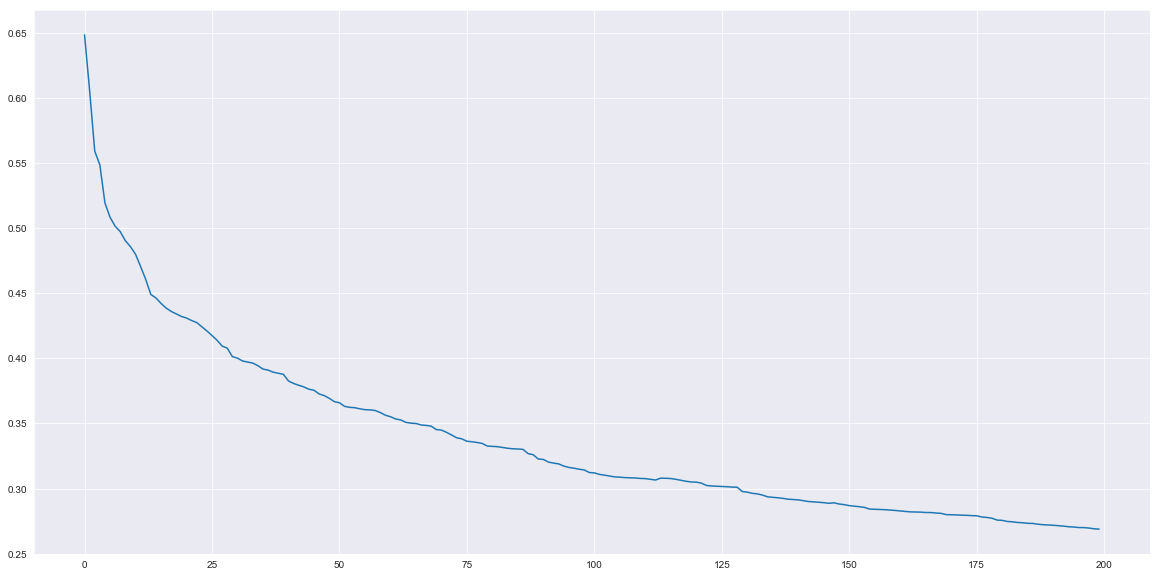

In [75]:
plt.figure(figsize=(20,10))

test_score = heldout_score(best_model, X_test, y_test)
plt.plot(range(len(test_score)), test_score);

In [76]:
print(classification_report(y_test,best_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.66      0.79     85363
         1.0       0.95      1.00      0.98    592829

    accuracy                           0.96    678192
   macro avg       0.96      0.83      0.88    678192
weighted avg       0.96      0.96      0.95    678192




Intuitively, an explanation is a local linear approximation of the model's behaviour. While the model may be very complex globally, it is easier to approximate it around the vicinity of a particular instance. While treating the model as a black box, we perturb the instance we want to explain and learn a sparse linear model around it, as an explanation.

### Ensemble Model Local Features Interpretation

#### Simple Decision Tree Classifier
Double click on the tree figure to zoom in!

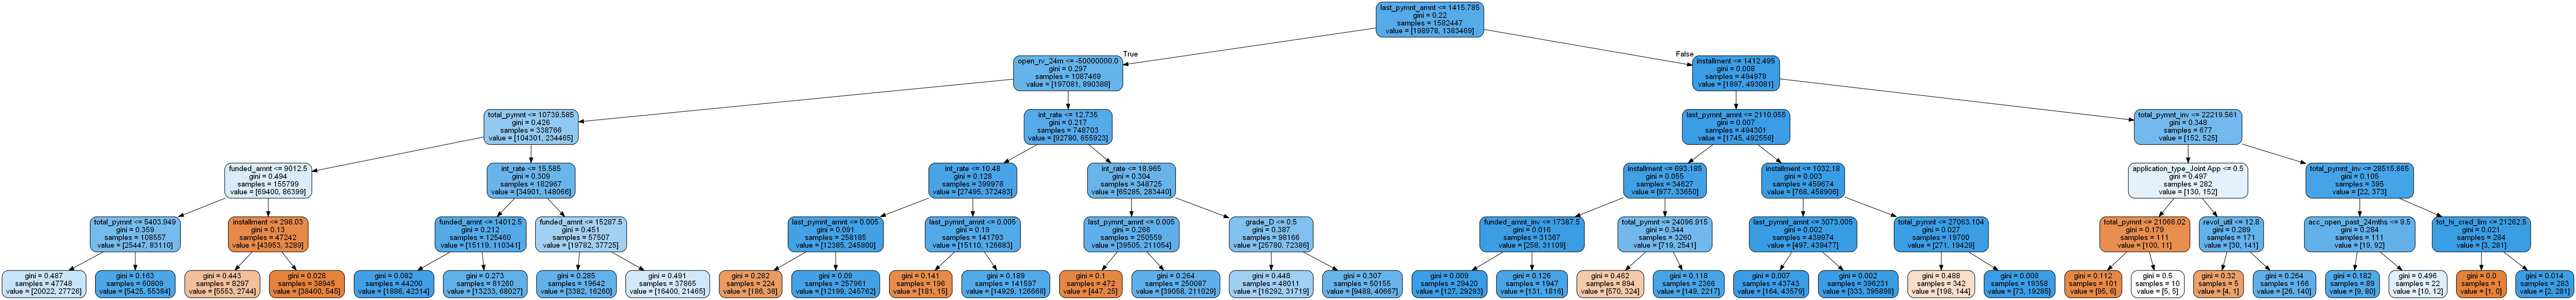

In [180]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
#Had to search for this code to view my feature splitting using dtree
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dt = DecisionTreeClassifier(max_depth = 5, random_state=1)

# fitting the decision tree model on the training set
dt.fit(X_train, y_train)

plt.figure(figsize=(25,25));

dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,feature_names=X_train.columns,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Below I am trying to interpret my champion Gradient boosting Model, by fitting its train predictions on a simple decision tree.

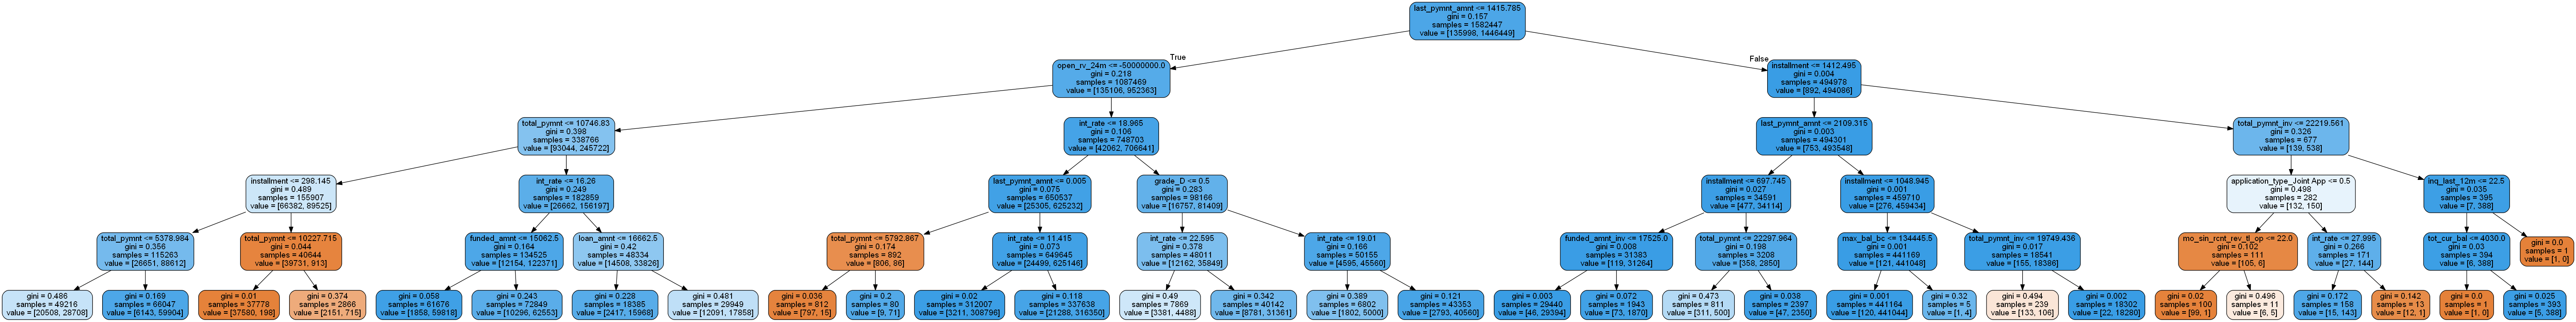

In [183]:
# saving the predictions of Random Forest as new target
new_target = best_model.predict(X_train)

# defining the interpretable decision tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=1)

# fitting the surrogate decision tree model using the training set and new target
dt_model.fit(X_train,new_target)

plt.figure(figsize=(25,25));

dot_data_2 = StringIO()  
export_graphviz(dt_model, out_file=dot_data_2,feature_names=X_train.columns,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data_2.getvalue())  
Image(graph.create_png())

#### LIME (Local Interpretable Model Agnostic Explanations)

Lime explains a certain observation locally, in the neighborhood of this prediction that is being explained.

In [77]:
# import Explainer function from lime_tabular module of lime library
from lime.lime_tabular import LimeTabularExplainer

# creating the explainer function
explainer = LimeTabularExplainer(X_train.values, mode="classification", feature_names=X_train.columns)

# fetching any observation 
i = 52
X_observation = X_test.iloc[[i], :]

best_model.predict(X_observation)[0]

1.0

In [78]:
# explanation using the gradient boosting
explanation = explainer.explain_instance(X_observation.values[0], best_model.predict_proba)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.05361409066942569


This pacakge helps interpret how each feature had a positive or negative effect on the class prediction.
Negative (blue) feature indicate "0" (Default), while positive (orange) feature indicate "1" (No Default). The way to interpret the weights is by applying them to the prediction probabilities. For example, if we remove the variables pymnt_plan_y, purpose_renewable_energy and grade_G from the data, we expect the classifier to predict "1" (Default) with probability 0.90 - 0.29 - 0.27 - 0.15 = 0.19 (19%). Similarly, removing installment, hardship_flag_Y & num_tl_120dpd_2m will increase probability of predicting 0 to 0.1 + 0.15 + 0.05 + 0.04 = 0.34.



In [88]:
print(Y.value_counts(),y_train.value_counts()[0],y_test.value_counts())

1.0    1976298
0.0     284341
Name: loan_status, dtype: int64 198978 1.0    592829
0.0     85363
Name: loan_status, dtype: int64


In [89]:
# !python -m pip install --upgrade pip

# Neural Network Model 

Build a Neural Network, and a Logistic model on the same data (Lending Loan Club). Refer to the NN code, on the eLearning, to do Grid Search. Fix the number of nodes at each layer to five. Play with number of layers, dropout regularization, batch size, and number of epochs. use the same test/train as the one you used for ensemble model. For missing value imputation use your choice; look up the suggestions on the Internet.

Compare the the champion models of each technique. 

In [80]:
#Reducing my data tables dimensions by including feature importance according to ensemble model champion model
features = list(feature_importance_2['Variable'][feature_importance_2.Importance >0].values)
X_new = model_data[features]
Y_new = model_data[target]
X_train_select,X_test_select,y_train_select,y_test_select=train_test_split(X_new,Y_new,test_size=0.3,random_state= 0)

In [90]:
# Feature Scaling
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train_select) #ONLY FIT to train data!!
scaled_test = scaler.transform(X_test_select)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

In [92]:

# first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
classifier = Sequential()
# add the first hidden layer
classifier.add(Dense(units=5,kernel_initializer='glorot_uniform',
                activation = 'relu'))
# add the second hidden layer
classifier.add(Dense(units=5,kernel_initializer='glorot_uniform',
                activation = 'relu'))
# add the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                activation = 'sigmoid'))
# compiling the NN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [93]:
# train the model
classifier.fit(scaled_train,y_train_select.values,validation_data=(scaled_test, y_test_select),batch_size=10,epochs=20)

Train on 1582447 samples, validate on 678192 samples
Epoch 1/20
1582447/1582447 [==============================] - 505s 319us/step - loss: 0.2054 - acc: 0.9262 - val_loss: 0.1991 - val_acc: 0.9296
Epoch 2/20
1582447/1582447 [==============================] - 514s 325us/step - loss: 0.1900 - acc: 0.9312 - val_loss: 0.1818 - val_acc: 0.9343
Epoch 3/20
1582447/1582447 [==============================] - 480s 303us/step - loss: 0.1851 - acc: 0.9328 - val_loss: 0.1981 - val_acc: 0.9290
Epoch 4/20
1582447/1582447 [==============================] - 474s 300us/step - loss: 0.1830 - acc: 0.9335 - val_loss: 0.1814 - val_acc: 0.9342
Epoch 5/20
1582447/1582447 [==============================] - 472s 298us/step - loss: 0.1816 - acc: 0.9338 - val_loss: 0.1783 - val_acc: 0.9353
Epoch 6/20
1582447/1582447 [==============================] - 469s 297us/step - loss: 0.1807 - acc: 0.9340 - val_loss: 0.1812 - val_acc: 0.9339
Epoch 7/20
1582447/1582447 [==============================] - 473s 299us/step - los

In [94]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 420       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [118]:
classifier.history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

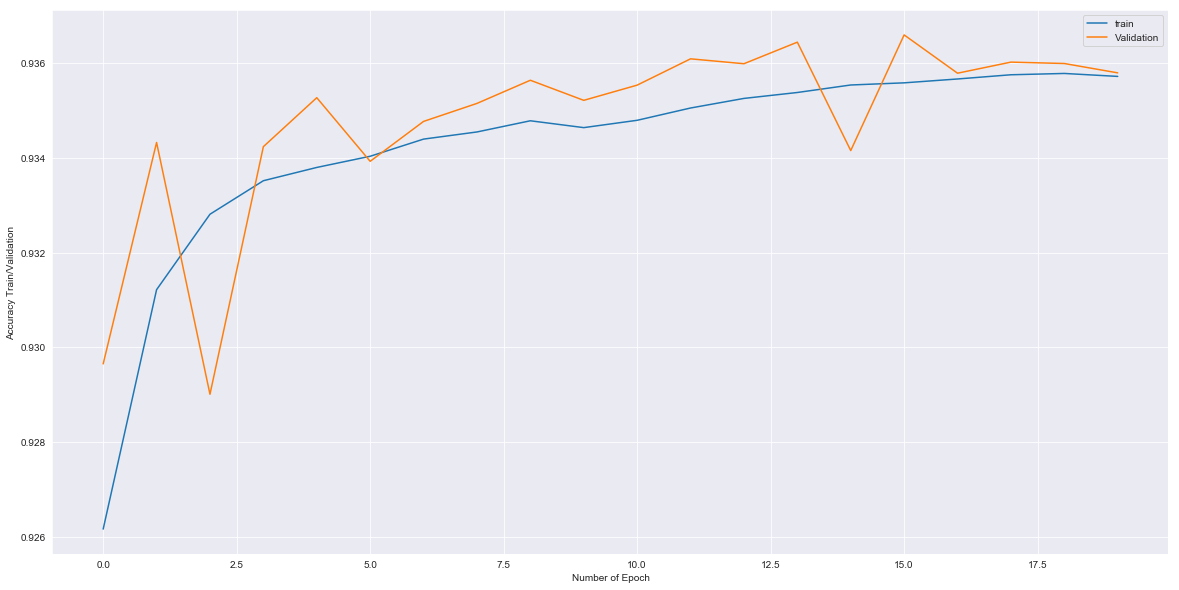

In [187]:
#learning curves of model accuracy
from matplotlib import pyplot
plt.figure(figsize=(20,10))

pyplot.plot(classifier.history.history['acc'], label='train')#.hist.hist if didnt worj
pyplot.plot(classifier.history.history['val_acc'], label='Validation')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy Train/Validation')
pyplot.legend();


        Line Plot Learning Curves of Model Accuracy on Train and Validation Datasets over Each Training Epoch

In [126]:
# Predicting the Test set results
y_pred = classifier.predict(scaled_test)
y_pred = (y_pred>0.5)
print(confusion_matrix(y_test_select, y_pred))

[[ 44376  40987]
 [  2553 590276]]
678192/678192 [==============================] - 21s 32us/step
[0.17652822632448834, 0.9357998914761602]


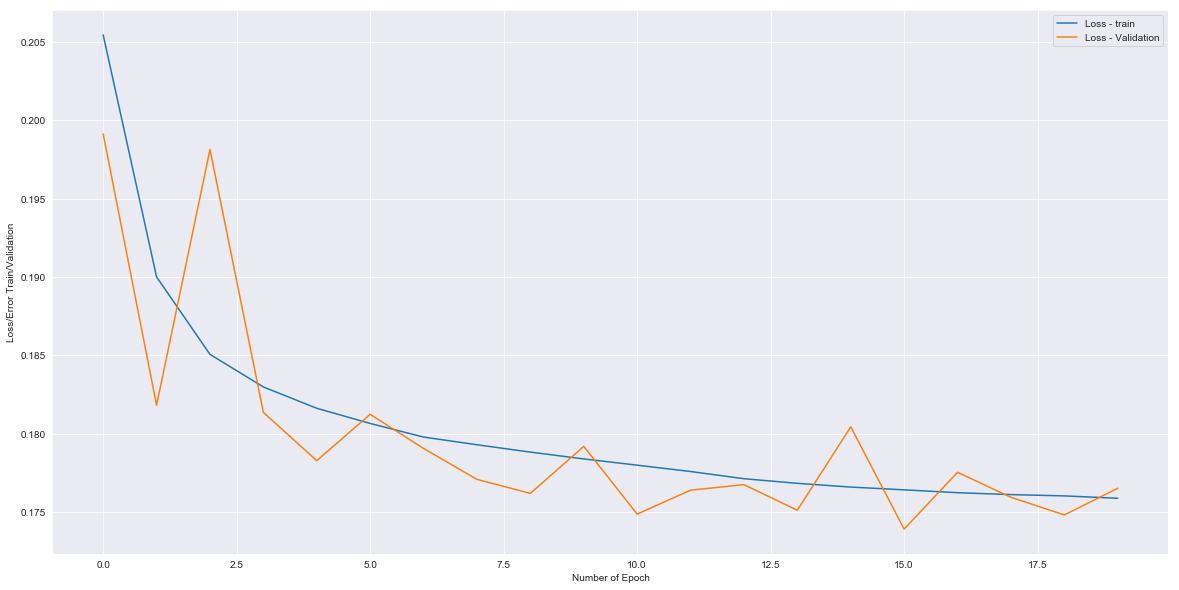

In [186]:
plt.figure(figsize=(20,10))
loss_per_epoch = classifier.history.history['loss']


pyplot.plot(range(len(loss_per_epoch)),loss_per_epoch, label='Loss - train')
pyplot.plot(classifier.history.history['val_loss'], label='Loss - Validation')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss/Error Train/Validation')
pyplot.legend();


               Line Plot Learning Curves of Model Error on Train and Validation Datasets over Each Training Epoch

In [128]:
print("Loss vs Accuracy in TRAIN: ", classifier.evaluate(scaled_train, y_train_select))
print("Loss vs Accuracy in TEST: ",classifier.evaluate(scaled_test, y_test_select))

1582447/1582447 [==============================] - 58s 37us/step
Loss vs Accuracy in TRAIN:  [0.17657826849119823, 0.9355719338467953]
678192/678192 [==============================] - 23s 34us/step
Loss vs Accuracy in TEST:  [0.17652822632448834, 0.9357998914761602]


In [129]:
# Another way to display accuracy score
y_train_pred = classifier.predict_classes(scaled_train)
y_test_pred = classifier.predict_classes(scaled_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train_select, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test_select, y_test_pred)))

The Accuracy score on the Train set is:	0.936
The Accuracy score on the Test set is:	0.936


## GridSearch on Neural Netwroks Parameters

In [130]:
# fine tuning with Grid Search
def build_classifier(optimizer):
    # first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
    nn_model = Sequential()
    # add the first hidden layer
    nn_model.add(Dense(units=5,kernel_initializer='glorot_uniform',
                    activation = 'relu'))
    # add the second hidden layer
    nn_model.add(Dense(units=5,kernel_initializer='glorot_uniform',
                    activation = 'relu'))
    # add the output layer
    nn_model.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'sigmoid'))
    # compiling the NN
    nn_model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return nn_model

In [131]:
new_classifier = KerasClassifier(build_fn=build_classifier)

# create a dictionary of hyper-parameters to optimize
parameters = {'batch_size':[25,32], 'nb_epoch':[1,2,10],'optimizer':['adam','rmsprop','sgd']}
grid_search = GridSearchCV(estimator = new_classifier, param_grid = parameters, scoring = 'accuracy', cv=10)
grid_search = grid_search.fit(scaled_train[int(0.5*len(scaled_train)):],y_train_select.values[int(0.5*len(scaled_train)):])
# decreased train size for faster results. This is one way to get results faster if runing short on time
best_parameters = grid_search.best_params_ 
best_accuracy = grid_search.best_score_

Epoch 1/1
712101/712101 [==============================] - 67s 94us/step - loss: 0.2430 - acc: 0.9120
Epoch 1/1
712101/712101 [==============================] - 68s 96us/step - loss: 0.2210 - acc: 0.9200
Epoch 1/1
712101/712101 [==============================] - 68s 96us/step - loss: 0.2219 - acc: 0.9192
Epoch 1/1
712101/712101 [==============================] - 69s 97us/step - loss: 0.2158 - acc: 0.9219
Epoch 1/1
712102/712102 [==============================] - 85s 119us/step - loss: 0.2451 - acc: 0.9083
Epoch 1/1
712102/712102 [==============================] - 74s 104us/step - loss: 0.2367 - acc: 0.9149
Epoch 1/1
712102/712102 [==============================] - 77s 108us/step - loss: 0.2242 - acc: 0.9185
Epoch 1/1
712102/712102 [==============================] - 74s 104us/step - loss: 0.2277 - acc: 0.9186
Epoch 1/1
712102/712102 [==============================] - 77s 108us/step - loss: 0.3076 - acc: 0.8912
Epoch 1/1
712102/712102 [==============================] - 79s 110us/step - l

712102/712102 [==============================] - 177s 248us/step - loss: 0.2199 - acc: 0.9207
Epoch 1/1
712102/712102 [==============================] - 180s 253us/step - loss: 0.2475 - acc: 0.9077
Epoch 1/1
712102/712102 [==============================] - 181s 254us/step - loss: 0.2220 - acc: 0.9201
Epoch 1/1
712102/712102 [==============================] - 184s 258us/step - loss: 0.2284 - acc: 0.9167
Epoch 1/1
712102/712102 [==============================] - 184s 258us/step - loss: 0.2199 - acc: 0.9207
Epoch 1/1
712101/712101 [==============================] - 181s 254us/step - loss: 0.2351 - acc: 0.9166
Epoch 1/1
712101/712101 [==============================] - 181s 254us/step - loss: 0.2325 - acc: 0.9176
Epoch 1/1
712101/712101 [==============================] - 181s 254us/step - loss: 0.2416 - acc: 0.9129
Epoch 1/1
712101/712101 [==============================] - 183s 256us/step - loss: 0.2398 - acc: 0.9161
Epoch 1/1
712102/712102 [==============================] - 183s 257us/step

In [132]:
best_parameters

{'batch_size': 32, 'nb_epoch': 2, 'optimizer': 'adam'}

In [133]:
best_accuracy

0.9284804303206172

If predictions are skewed with gridsearch best estimator model, predicting one class ore than the other, its no surprise since we took half of the data set to gridsearch and all of the data set to fit the model.

In [143]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid_search.predict(scaled_test)
grid_predictions = (grid_predictions>0.5)
print(confusion_matrix(y_test_select,grid_predictions))
print("\n")
print(classification_report(y_test_select,grid_predictions))
print("\n")
print(accuracy_score(y_test_select,grid_predictions))

[[ 42652  42711]
 [  7128 585701]]


              precision    recall  f1-score   support

         0.0       0.86      0.50      0.63     85363
         1.0       0.93      0.99      0.96    592829

    accuracy                           0.93    678192
   macro avg       0.89      0.74      0.80    678192
weighted avg       0.92      0.93      0.92    678192



0.9265119612145233


In [148]:
# first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
best_classifier = Sequential()
# add the first hidden layer
best_classifier.add(Dense(units=5,kernel_initializer='glorot_uniform',
                activation = 'relu'))
# add the second hidden layer
best_classifier.add(Dense(units=5,kernel_initializer='glorot_uniform',
                activation = 'relu'))
# add the output layer
best_classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                activation = 'sigmoid'))
# compiling the NN
best_classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [149]:
# train the model on best params
best_classifier.fit(scaled_train,y_train_select.values,batch_size= 32, nb_epoch= 2)

Epoch 1/2
1582447/1582447 [==============================] - 512s 324us/step - loss: 0.2103 - acc: 0.9244
Epoch 2/2
1582447/1582447 [==============================] - 463s 292us/step - loss: 0.1931 - acc: 0.9311


In [151]:
# Predicting the Test set results
y_pred_best = best_classifier.predict(scaled_test)
y_pred_best = (y_pred_best>0.5)
print(classification_report(y_test_select,y_pred_best))

              precision    recall  f1-score   support

         0.0       0.90      0.52      0.66     85363
         1.0       0.94      0.99      0.96    592829

    accuracy                           0.93    678192
   macro avg       0.92      0.76      0.81    678192
weighted avg       0.93      0.93      0.92    678192



In [152]:
print("Loss vs Accuracy in TRAIN: ", best_classifier.evaluate(scaled_train, y_train_select))
print("Loss vs Accuracy in TEST: ",best_classifier.evaluate(scaled_test, y_test_select))

1582447/1582447 [==============================] - 446s 282us/step
Loss vs Accuracy in TRAIN:  [0.18774961646249408, 0.9326536686537114]
678192/678192 [==============================] - 189s 279us/step
Loss vs Accuracy in TEST:  [0.1874007791794713, 0.9326768820628967]


In [153]:
best_classifier.summary()

Model: "sequential_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_547 (Dense)            (None, 5)                 420       
_________________________________________________________________
dense_548 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_549 (Dense)            (None, 1)                 6         
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


### Representation of Inner Layers

In [156]:
best_classifier.layers #CHECK LAYERS FIRST!!!

In [157]:
import keras.backend as K
inp = best_classifier.layers[0].input
out = best_classifier.layers[1].output

features_function = K.function([inp], [out])
features_function

In [158]:
features_NN = features_function([scaled_test[:6000]])[0]
features_NN.shape

(678192, 5)

The hidden_features has a shape of (678192, 5) for 678192(test data) instances with 5 dimensions. 

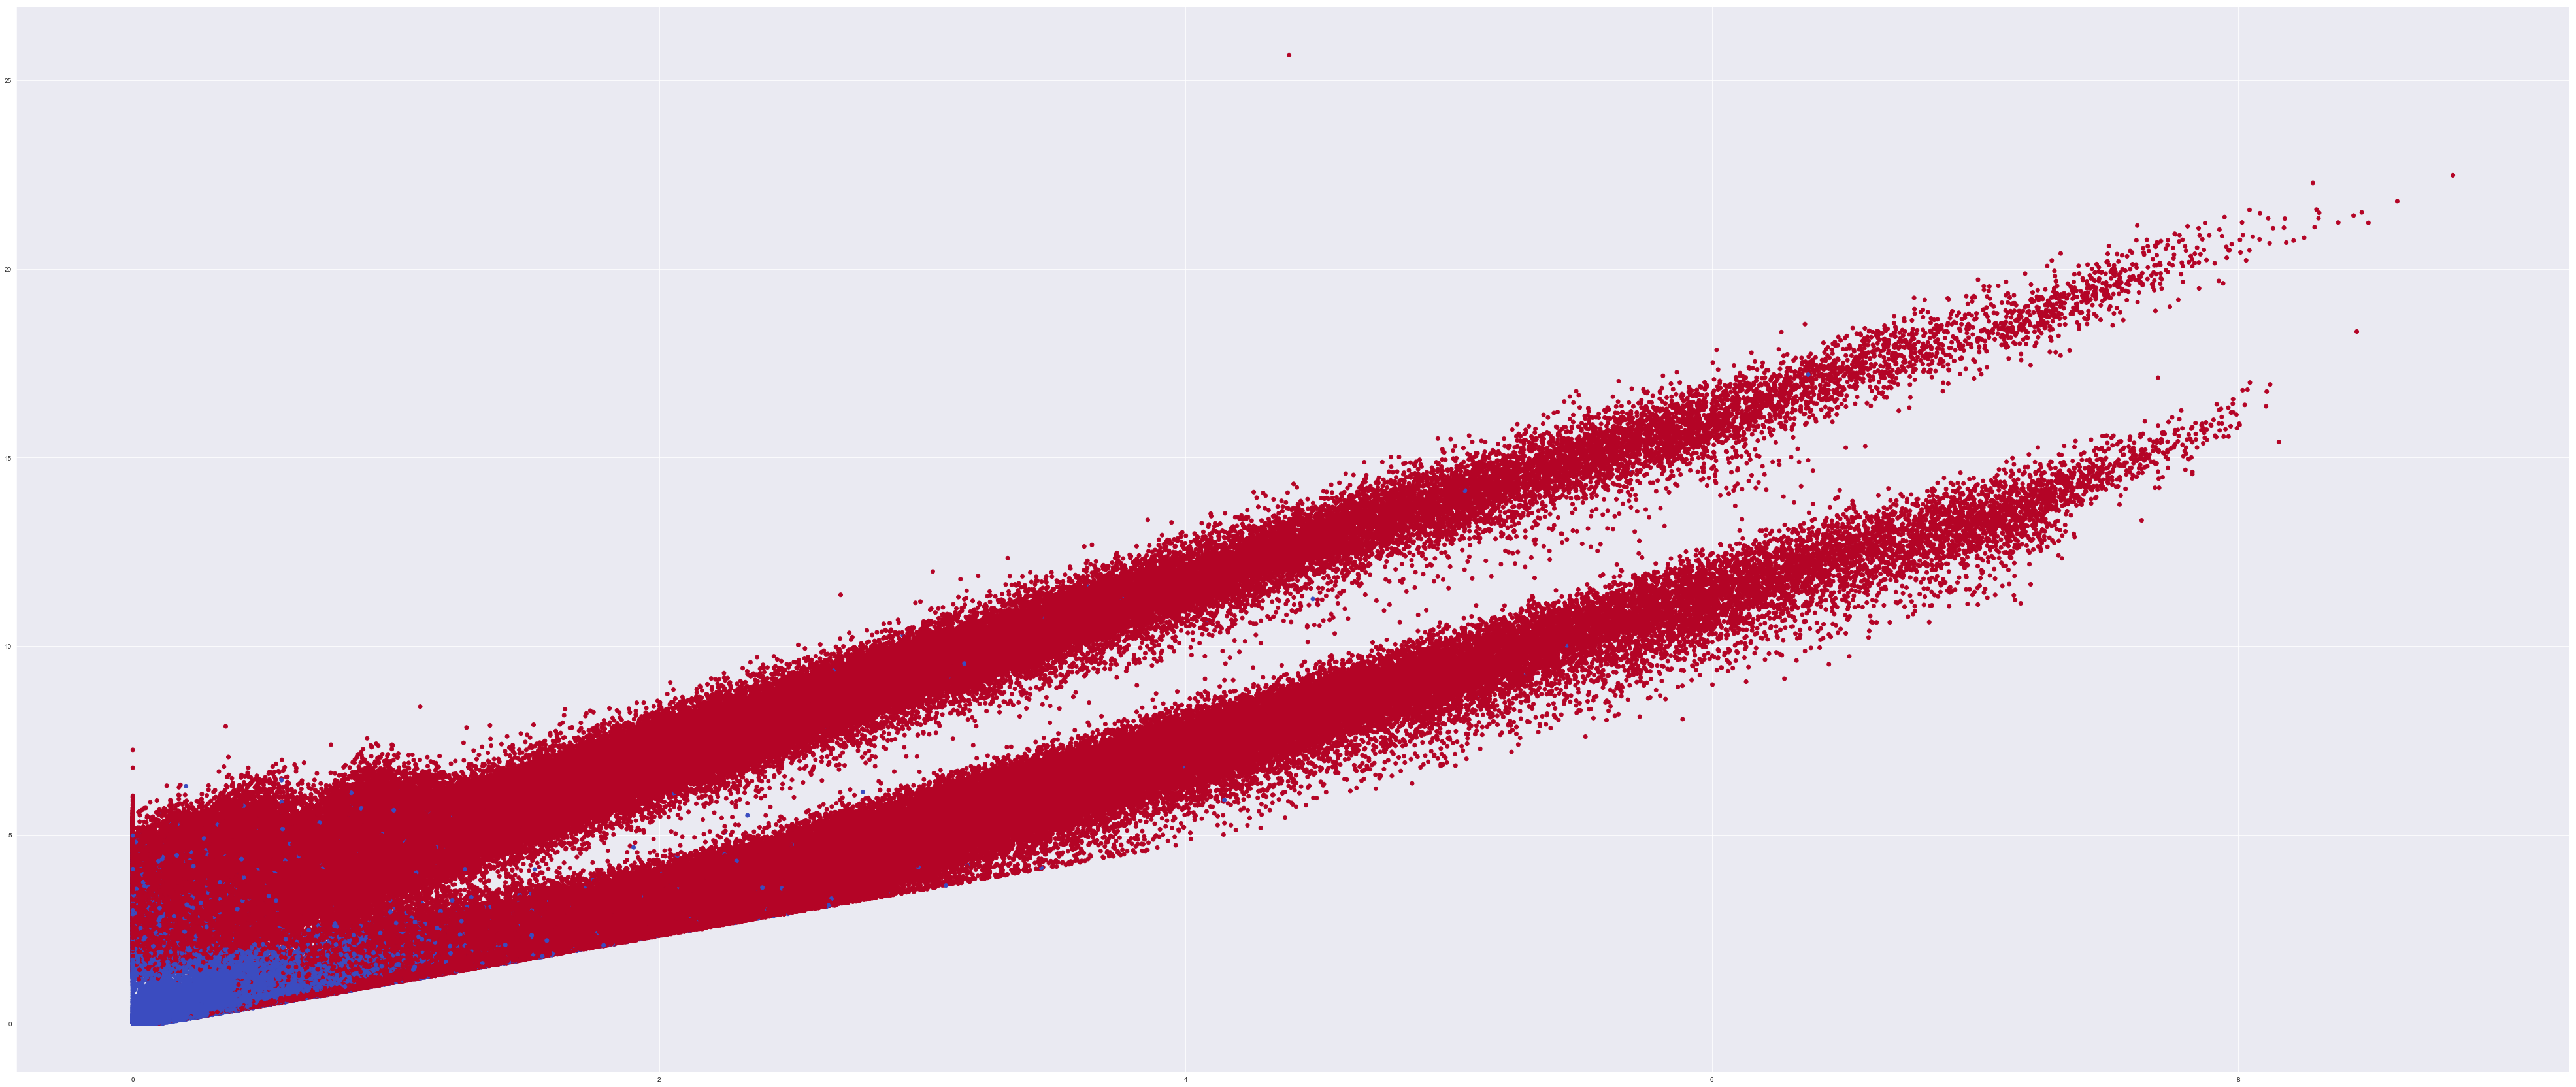

In [165]:
plt.figure(figsize=(70,30))
plt.scatter(features_NN[:, 0], features_NN[:, 1], c=y_test, cmap='coolwarm')
plt.legend()

In the plot, the blue (0 — negative class) is fairly separable from the red (1-positive class). Obviously, there are certain overlaps and the reason why our F-score is around 0.66 for class 0 and not closer to 1. Understanding and visualizing the outputs at different layers can help understand which layer is causing major errors in learning representations!
The features dimensions should be reduced to a 2-D instead of the 5-D I have shown above to get a clearer ditinguish between the data points (predictions).

### Save and Load Model Option

In [162]:
best_classifier.save('Loan_default_classifier_model.h5') 

In [163]:
from keras.models import load_model
classifier_model = load_model('Loan_default_classifier_model.h5')
classifier_model.summary()

Model: "sequential_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_547 (Dense)            (None, 5)                 420       
_________________________________________________________________
dense_548 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_549 (Dense)            (None, 1)                 6         
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


## Build Logistic Regression 
* Neural Net with no layers with output layer having sigmoid activation function.
* Sklearn Logistic Regression function

To get similar results in both approaches, we should change certain hyperparamters in both models.

#### Number of Iterations/Epochs:

In Keras the epochs passed should =  SKlearn max_iter passed to LogisticRegression(). It defaults to 100.
    * Solution: Make epochs = max_iter 

#### Optimizer

We are using "adam" optimizer in Keras, whereas LogisticRegression uses the liblinear optimizer by default. Sklearn calls it a "solver".

    * Solution: Optimizer = 'sgd' (stochastic gradient decsent)--->KERAS 
                Solver = 'sag' (stochastic average gradient descent) ----> SKLearn LR()
            
#### Regularization

Sklearn's LogisticRegression uses penalty = L2 regularization by default and no weight regularization is done in Keras. In Keras you can regularize the weights with each layer's kernel_regularizer or dropout regularization.
       * Solution: KERAS: kernel_regularizer=l2(0.) ---> from keras.regularizers import l2
                   SKLEARN: penalty = l2


#### KERAS Sigmoid Output Layer (No hidden layers)

In [7]:
# Reading in my data after notebook crashed. 
#Proccessed Model Data
read_data = pd.read_csv(r'C:\Users\Firo Obeid\Desktop\test\modeldata.csv')
read_features = pd.read_csv(r'C:\Users\Firo Obeid\Desktop\test\Feature_importance.csv')

In [14]:
target = 'loan_status'
features = list(read_features['Variable'].values)
X = read_data[features]
Y = read_data[target]
X_train_select,X_test_select,y_train_select,y_test_select=train_test_split(X,Y,test_size=0.3,random_state= 0)

# Feature Scaling
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train_select) #ONLY FIT to train data!!
scaled_test = scaler.transform(X_test_select)

In [15]:
from sklearn.linear_model import LogisticRegression
from keras.regularizers import l2
from keras.optimizers import SGD

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(units=1,kernel_initializer='glorot_uniform', activation='sigmoid',kernel_regularizer=l2(0.)))
    model.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [17]:
model_logit = KerasClassifier(build_fn=build_logistic_regression_model, batch_size = 10, nb_epoch = 10)
accuracies = cross_val_score(estimator=model_logit, X=scaled_train[:int(0.5*len(scaled_train))], y = y_train_select.values[:int(0.5*len(scaled_train))], cv=5, n_jobs=1)

Epoch 1/1
158245/158245 [==============================] - 14s 89us/step
Epoch 1/1
158245/158245 [==============================] - 14s 88us/step
Epoch 1/1
158245/158245 [==============================] - 14s 85us/step
Epoch 1/1
158244/158244 [==============================] - 14s 86us/step
Epoch 1/1
158244/158244 [==============================] - 14s 88us/step


In [18]:
accuracies.mean()

0.8890742476047485

In [19]:
accuracies.std()

0.0014772537570081382

In [20]:
model_logit.fit(scaled_train,y_train_select.values,batch_size=10,epochs=10)

Epoch 1/10
1582447/1582447 [==============================] - 331s 209us/step - loss: 0.2941 - acc: 0.8875
Epoch 2/10
1582447/1582447 [==============================] - 329s 208us/step - loss: 0.2752 - acc: 0.8942
Epoch 3/10
1582447/1582447 [==============================] - 297s 188us/step - loss: 0.2711 - acc: 0.8957
Epoch 4/10
1582447/1582447 [==============================] - 355s 224us/step - loss: 0.2685 - acc: 0.8966
Epoch 5/10
1582447/1582447 [==============================] - 387s 244us/step - loss: 0.2665 - acc: 0.8973
Epoch 6/10
1582447/1582447 [==============================] - 341s 215us/step - loss: 0.2650 - acc: 0.8979
Epoch 7/10
1582447/1582447 [==============================] - 341s 215us/step - loss: 0.2638 - acc: 0.8982
Epoch 8/10
1582447/1582447 [==============================] - 331s 209us/step - loss: 0.2629 - acc: 0.8986
Epoch 9/10
1582447/1582447 [==============================] - 310s 196us/step - loss: 0.2621 - acc: 0.8989
Epoch 10/10
1582447/1582447 [========

In [23]:
y_pred_logit = model_logit.predict(scaled_test)
y_pred_logit # Check values if binary or class predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [26]:
print(classification_report(y_test_select,y_pred_logit))
print(model_logit.score(scaled_test,y_test_select)) #Returns the mean accuracy on the given test data and labels.

              precision    recall  f1-score   support

           0       0.71      0.34      0.46     85363
           1       0.91      0.98      0.94    592829

    accuracy                           0.90    678192
   macro avg       0.81      0.66      0.70    678192
weighted avg       0.89      0.90      0.88    678192

678192/678192 [==============================] - 65s 95us/step
0.8998543112427028


#### SKLearn Logistic Regression

Regularization consists in adding a penalty on the different parameters of
the model to reduce the freedom of the model. Hence, the model will
be less likely to fit the noise of the training data and will improve the
generalization abilities of the model. For linear models there are in
general 3 types of regularisation:
* The L1 regularization (also called Lasso):  L1 / Lasso will shrink some parameters to zero, therefore allowing for feature elimination.
   
* The L2 regularization (also called Ridge): For l2 / Ridge, as the penalisation increases, the coefficients approach but do not equal zero, hence no variable is ever excluded!

* The L1/L2 regularization (also called Elastic net)

I will instantiate,below, three LR models to compare and try to get a close accuracy score as possible to the Keras version.

In [27]:
# Standard Logistic Regression Model
lrmodel = LogisticRegression()
lrmodel.fit(X_train_select,y_train_select)
predict = lrmodel.predict(X_test_select)
print(classification_report(y_test_select,predict))
print(lrmodel.score(X_test_select, y_test_select))

              precision    recall  f1-score   support

           0       0.23      0.01      0.02     85363
           1       0.87      1.00      0.93    592829

    accuracy                           0.87    678192
   macro avg       0.55      0.50      0.47    678192
weighted avg       0.79      0.87      0.82    678192

0.8715260575176351


In [28]:
# Tuned Logistic Regression Model using original dataset
logmodel = LogisticRegression(penalty='l2', solver='sag', max_iter=10)
logmodel.fit(X_train_select,y_train_select)
predictions = logmodel.predict(X_test_select)
print(classification_report(y_test_select,predictions))
print(logmodel.score(X_test_select, y_test_select))

              precision    recall  f1-score   support

           0       0.21      0.01      0.03     85363
           1       0.87      0.99      0.93    592829

    accuracy                           0.87    678192
   macro avg       0.54      0.50      0.48    678192
weighted avg       0.79      0.87      0.82    678192

0.8694986080637932


In [38]:
#Tuned Logistic Regression Model using scaled dataset
logmodel_scaled = LogisticRegression(penalty='l2', solver='sag', max_iter=10)
logmodel_scaled.fit(scaled_train,y_train_select)
predictions_scaled = logmodel_scaled.predict(scaled_test)
print(classification_report(y_test_select,predictions_scaled))
print(logmodel_scaled.score(scaled_test, y_test_select))

              precision    recall  f1-score   support

           0       0.75      0.34      0.47     85363
           1       0.91      0.98      0.95    592829

    accuracy                           0.90    678192
   macro avg       0.83      0.66      0.71    678192
weighted avg       0.89      0.90      0.89    678192

0.9023816264420695


0.8766775067876291


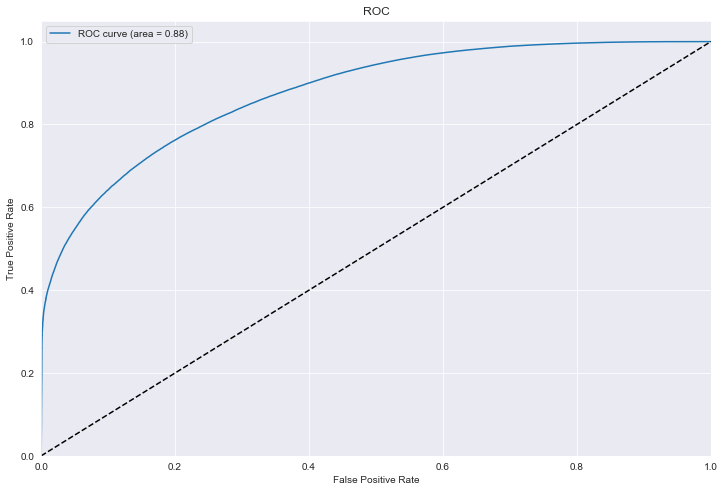

In [72]:
print(roc_auc_score(y_test_select, logmodel_scaled.predict_proba(scaled_test)[:,1]))
plt.figure(figsize=(12,8))
from sklearn_evaluation import plot
plot.roc(y_test_select, logmodel_scaled.predict_proba(scaled_test)[:,1]);

###### Conclusion 
* The sklearn logistic model with approximatly similar accuracy and performance to the KERAS version is the last one. 
* The scaled data fitted & tested in KERAS should also be fitted & tested in the SKLearn LR model.
* After adjusting the optimizer/solver, epochs/iterations and regularization in both KERAS and SKLearn models, we get, obviously, same result. An explanation to the marginal difference is the two models might be the batch_size in KERAS version, since it was not accounted for in the SKLearn model.


## Report Final Models on Test Data

* For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
* For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

In [59]:
accuracy_aggregate = pd.DataFrame()
accuracy_aggregate['Model'] = ['Ensemble Model', "First NN Classifier", "My Best Classifier", "NN Sigmoid Layer", "Simple Logiestic Regression","Tuned LR(Unscaled DATA)","Tuned LR(Scaled DATA)"]
accuracy_aggregate['Accuracy on Test Data'] = [0.96,0.93, 0.92, 0.9,0.87, 0.86, 0.90]
accuracy_aggregate

Model  Accuracy on Test Data
0               Ensemble Model                   0.96
1          First NN Classifier                   0.93
2           My Best Classifier                   0.92
3             NN Sigmoid Layer                   0.90
4  Simple Logiestic Regression                   0.87
5      Tuned LR(Unscaled DATA)                   0.86
6        Tuned LR(Scaled DATA)                   0.90